In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro
from scipy import stats

# Scale 변환-> 설명변수 변환 : 회귀분석.설명변수 회귀계수 표준화
from sklearn.preprocessing import StandardScaler

# train, test 데이터 분할 함수
from sklearn.model_selection import train_test_split

# 회귀모델 
import statsmodels.formula.api as smf
import statsmodels.api as sm
# 선형회귀모형
from sklearn.linear_model import LinearRegression

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE

# 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from statsmodels.formula.api import ols

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False
# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

import warnings # 폰트체크 경고 무시
warnings.filterwarnings('ignore')

In [3]:
df_raw = pd.read_csv("/home/piai/다운로드/2주차 실습파일/2. Big Data 분석/SCALE불량.csv",encoding = "euc-kr")
df_raw

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,2열,1142,55,1151,86,203,CR(제어압연),948,10,4조
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,2열,1142,55,1151,86,209,CR(제어압연),948,10,4조
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,227,CR(제어압연),948,10,4조
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,204,CR(제어압연),948,10,4조


In [4]:
df_raw.drop(['plate_no','rolling_date','spec_long','spec_country'], axis = 1, inplace = True)
##plate_no/ 고유변호로 큰의미가 없음
##rolling_date/시작시간이라 큰 의미가 없음
##spec_long,spec_country/고객들이 요구한 제품이라 제품 규격은 큰의미 없음

In [5]:
df_raw

,scale,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,양품,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,양품,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,양품,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,양품,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,양품,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,양품,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,203,CR(제어압연),948,10,4조
996,양품,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,209,CR(제어압연),948,10,4조
997,양품,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,227,CR(제어압연),948,10,4조
998,양품,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,204,CR(제어압연),948,10,4조


In [6]:
df_raw['scale'].replace({"양품":0,"불량":1},inplace=True)
##scale이 목표변수이기 때문에 컴퓨터가 읽을 수 있게 변환
##양품=0,불량품=1로 구분했다.

In [7]:
df_raw

,scale,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,0,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,0,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,0,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,0,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,0,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,203,CR(제어압연),948,10,4조
996,0,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,209,CR(제어압연),948,10,4조
997,0,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,227,CR(제어압연),948,10,4조
998,0,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,204,CR(제어압연),948,10,4조


In [8]:
df_raw.columns

Index(['scale', 'steel_kind', 'pt_thick', 'pt_width', 'pt_length', 'hsb',
       'fur_no', 'fur_input_row', 'fur_heat_temp', 'fur_heat_time',
       'fur_soak_temp', 'fur_soak_time', 'fur_total_time', 'rolling_method',
       'rolling_temp', 'descaling_count', 'work_group'],
      dtype='object')

In [9]:
df_raw.head()

,scale,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,0,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,0,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,0,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,0,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,0,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조


In [10]:
df_raw.shape

(1000, 17)

In [11]:
df_raw.dtypes

scale               int64
steel_kind         object
pt_thick            int64
pt_width            int64
pt_length           int64
hsb                object
fur_no             object
fur_input_row      object
fur_heat_temp       int64
fur_heat_time       int64
fur_soak_temp       int64
fur_soak_time       int64
fur_total_time      int64
rolling_method     object
rolling_temp        int64
descaling_count     int64
work_group         object
dtype: object

In [12]:
df_raw.isnull().sum()

scale              0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

##결측치 없음

scale                 Axes(0.125,0.11;0.0596154x0.77)
pt_thick           Axes(0.196538,0.11;0.0596154x0.77)
pt_width           Axes(0.268077,0.11;0.0596154x0.77)
pt_length          Axes(0.339615,0.11;0.0596154x0.77)
fur_heat_temp      Axes(0.411154,0.11;0.0596154x0.77)
fur_heat_time      Axes(0.482692,0.11;0.0596154x0.77)
fur_soak_temp      Axes(0.554231,0.11;0.0596154x0.77)
fur_soak_time      Axes(0.625769,0.11;0.0596154x0.77)
fur_total_time     Axes(0.697308,0.11;0.0596154x0.77)
rolling_temp       Axes(0.768846,0.11;0.0596154x0.77)
descaling_count    Axes(0.840385,0.11;0.0596154x0.77)
dtype: object

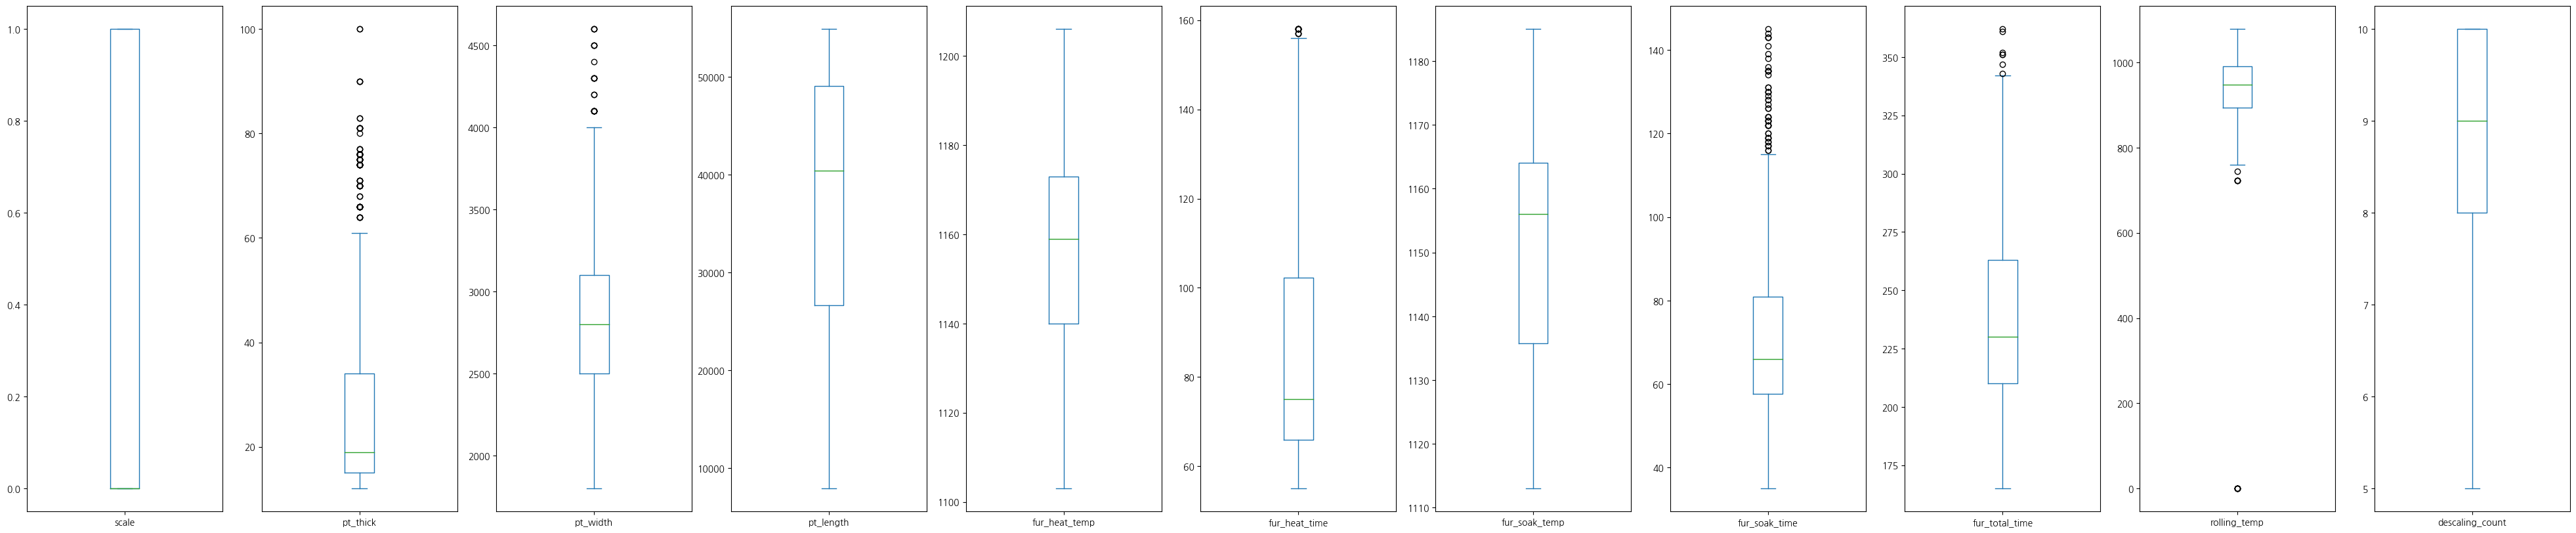

In [13]:
## 이상치 찾기
df_raw.plot(kind = "box", figsize = (50,10), subplots = True, sharex = False, sharey = False)


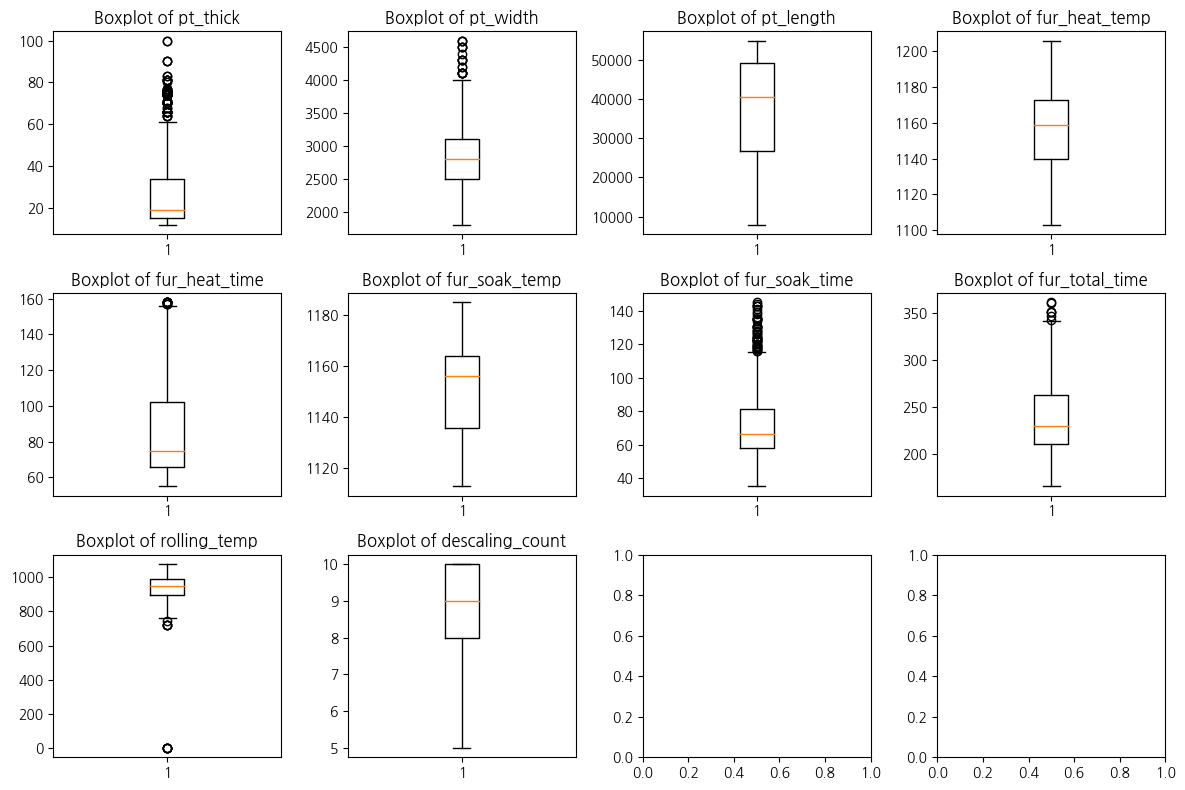

In [14]:
# 이상치 확인
variables = ['pt_thick', 'pt_width', 'pt_length', 'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp', 'fur_soak_time',
             'fur_total_time', 'rolling_temp', 'descaling_count']

# Boxplot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))  # 3행 4열의 subplot 생성
axes = axes.flatten()  # 2차원 배열을 1차원으로 펼치기

for i, variable in enumerate(variables):
    axes[i].boxplot(df_raw[variable])
    axes[i].set_title(f"Boxplot of {variable}")

# subplot 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()

<Axes: title={'center': 'rolling_temp'}, xlabel='scale'>

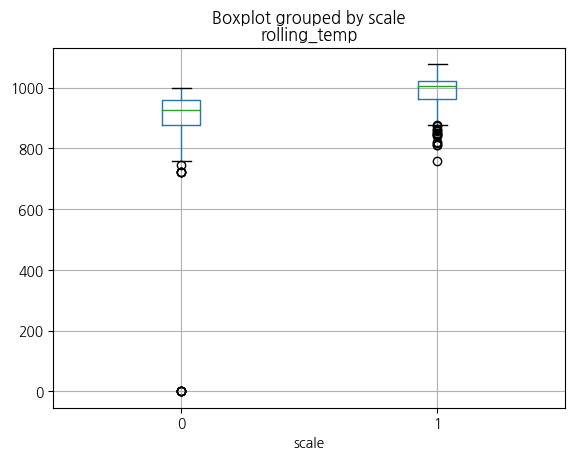

In [15]:
##rolling_temp 이상치 처리 -1
df_raw.boxplot(column = "rolling_temp", by = "scale")

In [16]:
df_raw = df_raw[df_raw['rolling_temp'] > 600]

# 대부분의 금속은 낮은 온도에서 취성을 가지기 때문에,0도에서의 압연은 실질적으로 수행되지 않습니다.
# 다른 곳은 0도 대체 했다는데 어떻게 생각????????

<Axes: title={'center': 'rolling_temp'}, xlabel='scale'>

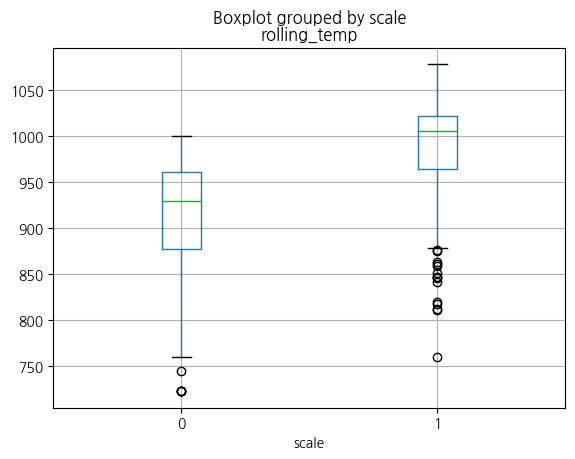

In [17]:
##rolling_temp 이상치 처리(후)
df_raw.boxplot(column = "rolling_temp", by = "scale")

<Axes: >

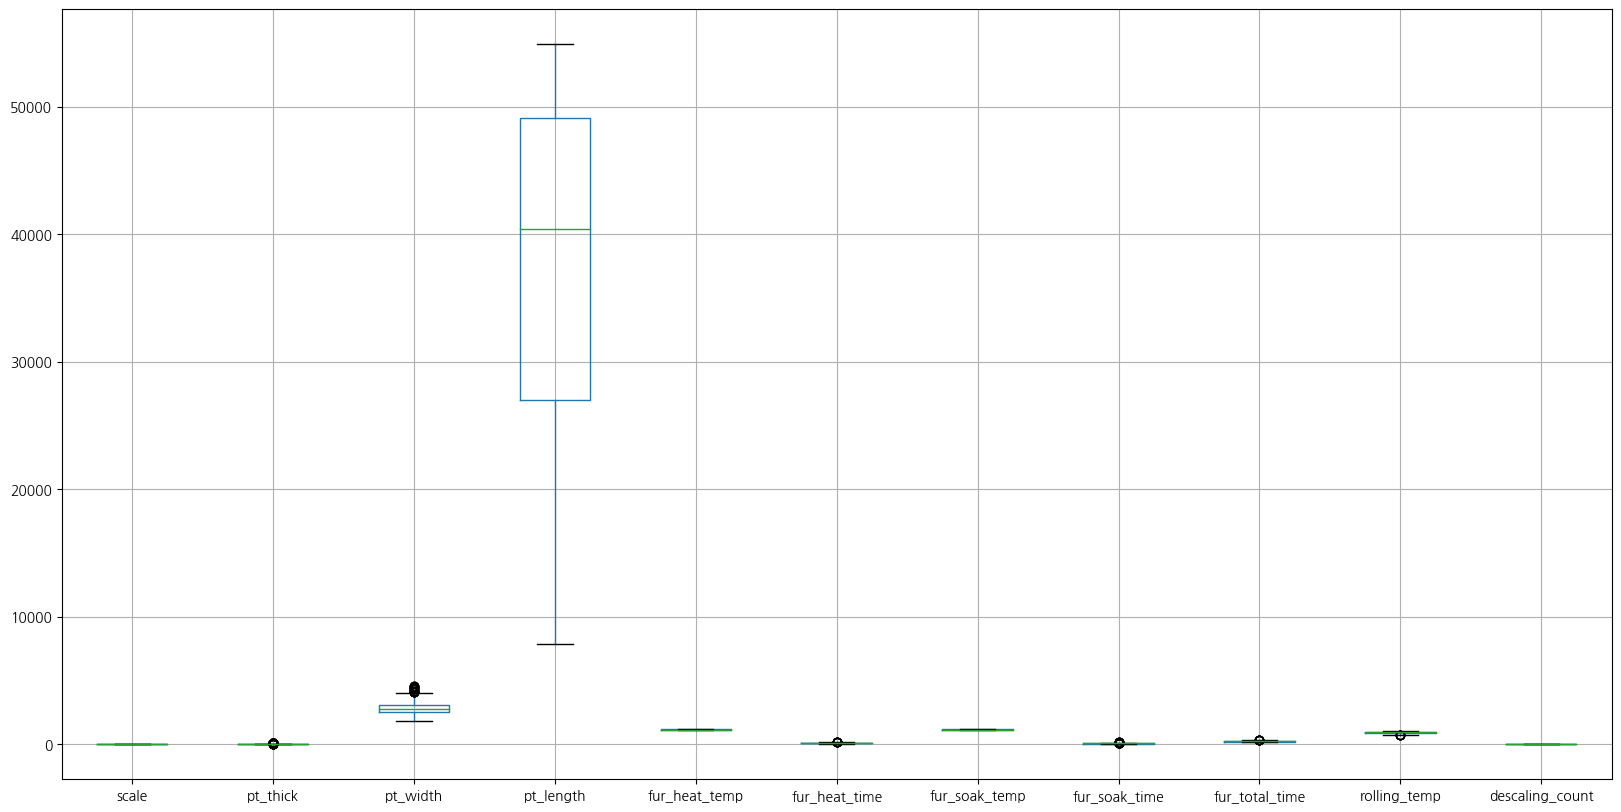

In [18]:
df_raw.boxplot(figsize=(20,10)) ##이상치 제거 후 boxplot

In [19]:
df_raw

,scale,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,0,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,0,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,0,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,0,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,0,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,203,CR(제어압연),948,10,4조
996,0,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,209,CR(제어압연),948,10,4조
997,0,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,227,CR(제어압연),948,10,4조
998,0,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,204,CR(제어압연),948,10,4조


In [20]:
df_raw.shape

(994, 17)

In [21]:
## 열이나 호기 단위를 없앰(단위제거)
df_raw['fur_no'] = df_raw['fur_no'].str.replace("호기", "")
df_raw['fur_input_row'] = df_raw['fur_input_row'].str.replace("열", "")
df_raw['work_group'] = df_raw['work_group'].str.replace("조", "")

In [22]:
df_raw

,scale,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,0,T,32,3700,15100,적용,1,1,1144,116,1133,59,259,TMCP(온도제어),934,8,1
1,0,T,32,3700,15100,적용,1,2,1144,122,1135,53,238,TMCP(온도제어),937,8,1
2,0,T,33,3600,19200,적용,2,1,1129,116,1121,55,258,TMCP(온도제어),889,8,1
3,0,T,33,3600,19200,적용,2,2,1152,125,1127,68,266,TMCP(온도제어),885,8,1
4,0,T,38,3100,13300,적용,3,1,1140,134,1128,48,246,TMCP(온도제어),873,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,C,19,3400,41500,적용,1,2,1142,55,1151,86,203,CR(제어압연),948,10,4
996,0,C,19,3400,41500,적용,1,2,1142,55,1151,86,209,CR(제어압연),948,10,4
997,0,C,17,3400,43700,적용,2,2,1169,65,1163,77,227,CR(제어압연),948,10,4
998,0,C,17,3400,43700,적용,2,2,1169,65,1163,77,204,CR(제어압연),948,10,4


In [23]:
df_raw.dtypes

scale               int64
steel_kind         object
pt_thick            int64
pt_width            int64
pt_length           int64
hsb                object
fur_no             object
fur_input_row      object
fur_heat_temp       int64
fur_heat_time       int64
fur_soak_temp       int64
fur_soak_time       int64
fur_total_time      int64
rolling_method     object
rolling_temp        int64
descaling_count     int64
work_group         object
dtype: object

In [24]:
df_raw['hsb'].replace({"적용": 0, "미적용": 1}, inplace=True)
df_raw['rolling_method'].replace({"TMCP(온도제어)": 0, "CR(제어압연)": 1}, inplace=True)

### 층별화 1.hsb

In [25]:
df_raw

,scale,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,0,T,32,3700,15100,0,1,1,1144,116,1133,59,259,0,934,8,1
1,0,T,32,3700,15100,0,1,2,1144,122,1135,53,238,0,937,8,1
2,0,T,33,3600,19200,0,2,1,1129,116,1121,55,258,0,889,8,1
3,0,T,33,3600,19200,0,2,2,1152,125,1127,68,266,0,885,8,1
4,0,T,38,3100,13300,0,3,1,1140,134,1128,48,246,0,873,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,C,19,3400,41500,0,1,2,1142,55,1151,86,203,1,948,10,4
996,0,C,19,3400,41500,0,1,2,1142,55,1151,86,209,1,948,10,4
997,0,C,17,3400,43700,0,2,2,1169,65,1163,77,227,1,948,10,4
998,0,C,17,3400,43700,0,2,2,1169,65,1163,77,204,1,948,10,4


In [26]:
df_raw['hsb'].value_counts()

0    947
1     47
Name: hsb, dtype: int64

In [27]:
df_raw = df_raw[df_raw['hsb'] == 0]  # hsb 적용이 0으로 인코딩되어 있다고 가정

In [28]:
df_raw['hsb'].value_counts()

0    947
Name: hsb, dtype: int64

### 층별화 2. 강종별 불량 비율 

steel_kind
C    35.335196
T     4.329004
Name: scale, dtype: float64


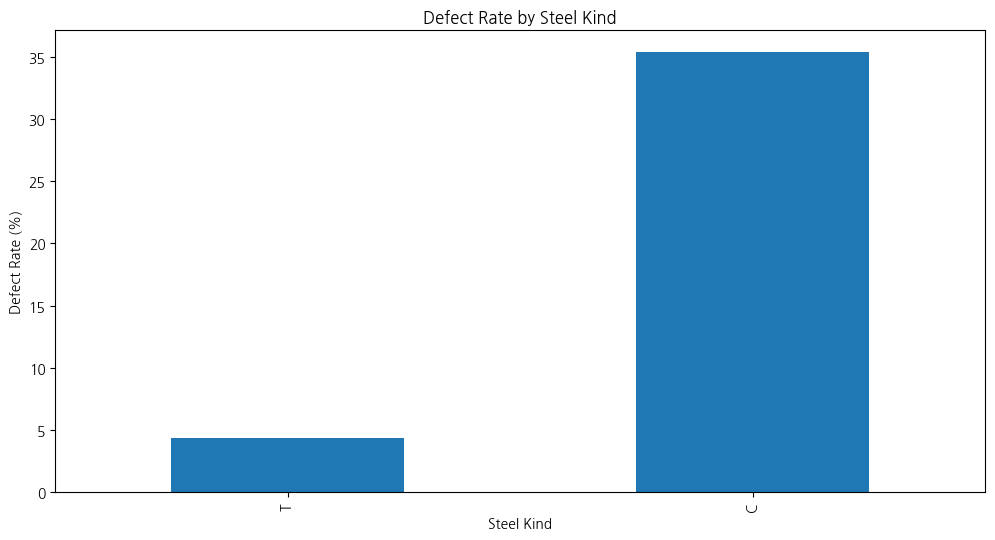

In [29]:
# 강종별 데이터 그룹화
steel_group = df_raw.groupby('steel_kind')

# 강종별 불량률 계산
defect_rate_by_steel_kind = steel_group['scale'].mean() * 100  # 불량률(%)로 변환

# 결과 출력
print(defect_rate_by_steel_kind)

# 시각화 (예: 막대 그래프)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
defect_rate_by_steel_kind.sort_values().plot(kind='bar')
plt.title('Defect Rate by Steel Kind')
plt.xlabel('Steel Kind')
plt.ylabel('Defect Rate (%)')
plt.show()


- 새로운내용 
##steel_kind에 따라 불량률이 다르기때문에 층별화를 해 T강 C강 전체적으로 데이터 전처리가 필요할 듯 하다.
##탄소강,고온 산소 반응 비교적 빠르게 약하고 부서지기 쉬워 descailing 횟수 많음 
##Ti강,고온 산화 매우 얇고 치밀 강하고 내구성 잘 탈락하지 않음 -> descailing 횟수 적음/ 산화층이 매우 얇고 단단한 보호막을 형성하여 금속이 더 이상 산화되는 것을 방지함. 보호 산화막이 잘 유지되기 때문에 스케일이 잘 형성 되지 않음 

array([[<Axes: title={'center': 'scale'}>,
        <Axes: title={'center': 'pt_thick'}>,
        <Axes: title={'center': 'pt_width'}>,
        <Axes: title={'center': 'pt_length'}>],
       [<Axes: title={'center': 'hsb'}>,
        <Axes: title={'center': 'fur_heat_temp'}>,
        <Axes: title={'center': 'fur_heat_time'}>,
        <Axes: title={'center': 'fur_soak_temp'}>],
       [<Axes: title={'center': 'fur_soak_time'}>,
        <Axes: title={'center': 'fur_total_time'}>,
        <Axes: title={'center': 'rolling_method'}>,
        <Axes: title={'center': 'rolling_temp'}>],
       [<Axes: title={'center': 'descaling_count'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

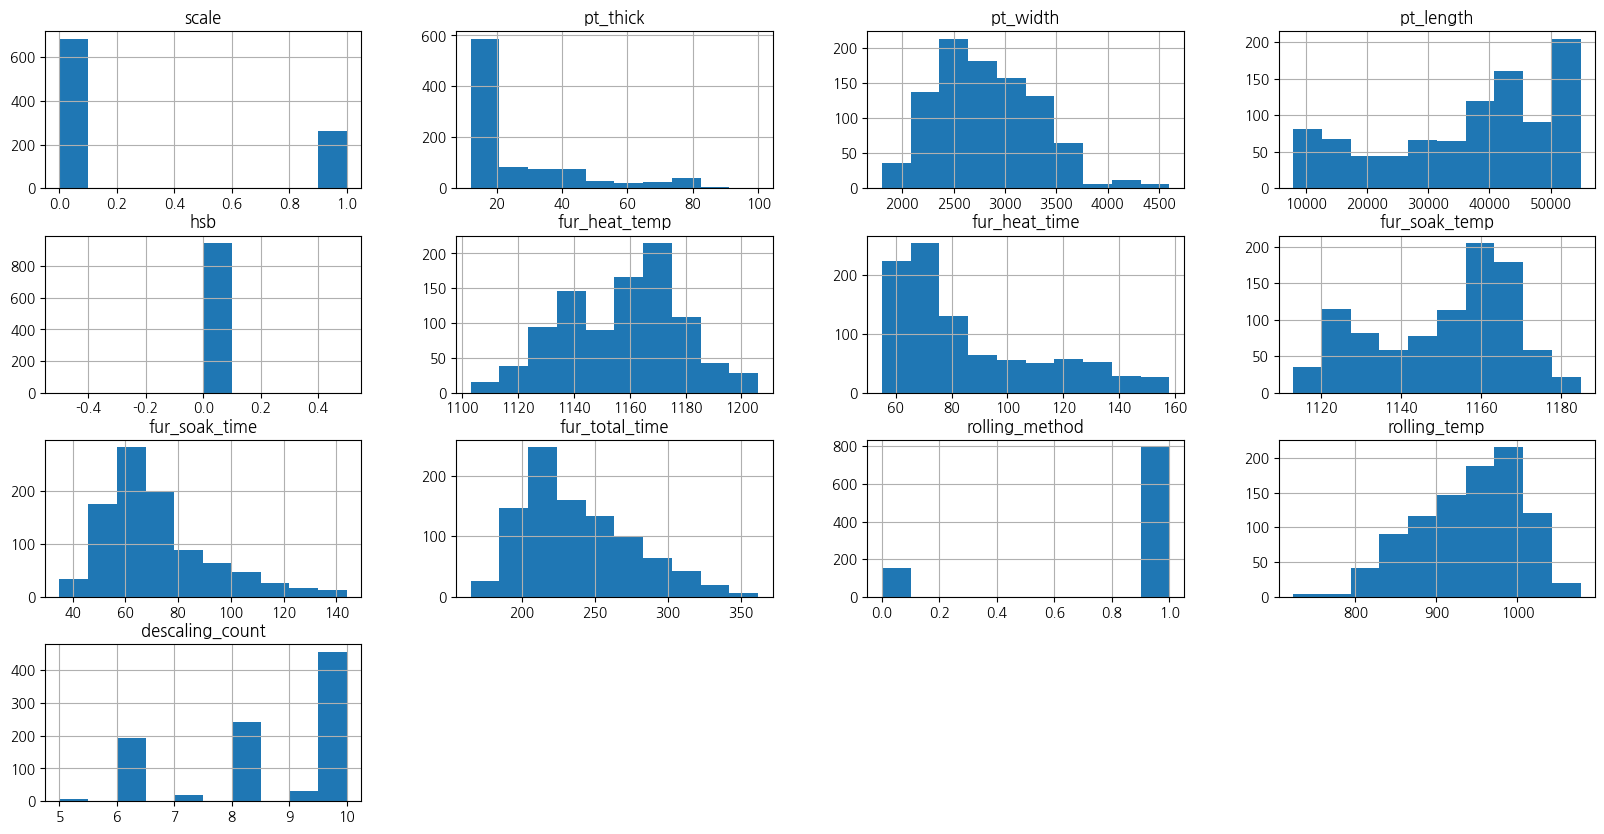

In [30]:
df_raw.hist(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

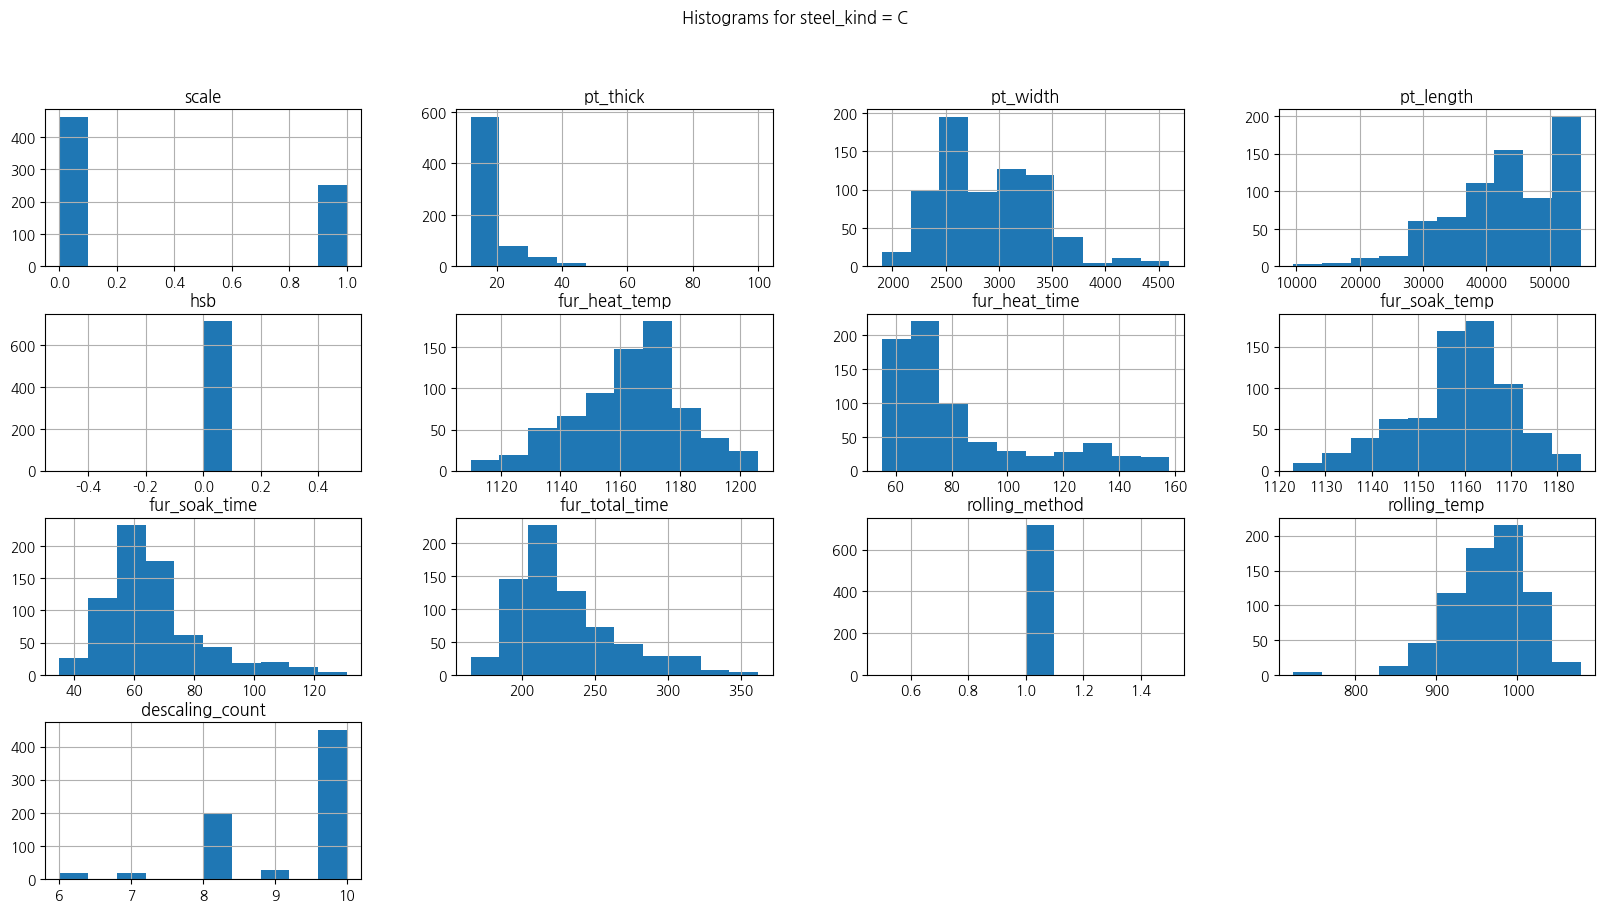

In [31]:
# Filter the data for steel_kind 'C'
df_raw_C = df_raw[df_raw['steel_kind'] == 'C']

# Plot histograms for the filtered data - steel_kind 'C'
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
df_raw_C.hist(figsize=(20, 10))
plt.suptitle('Histograms for steel_kind = C')
plt.show()


<Figure size 2000x1000 with 0 Axes>

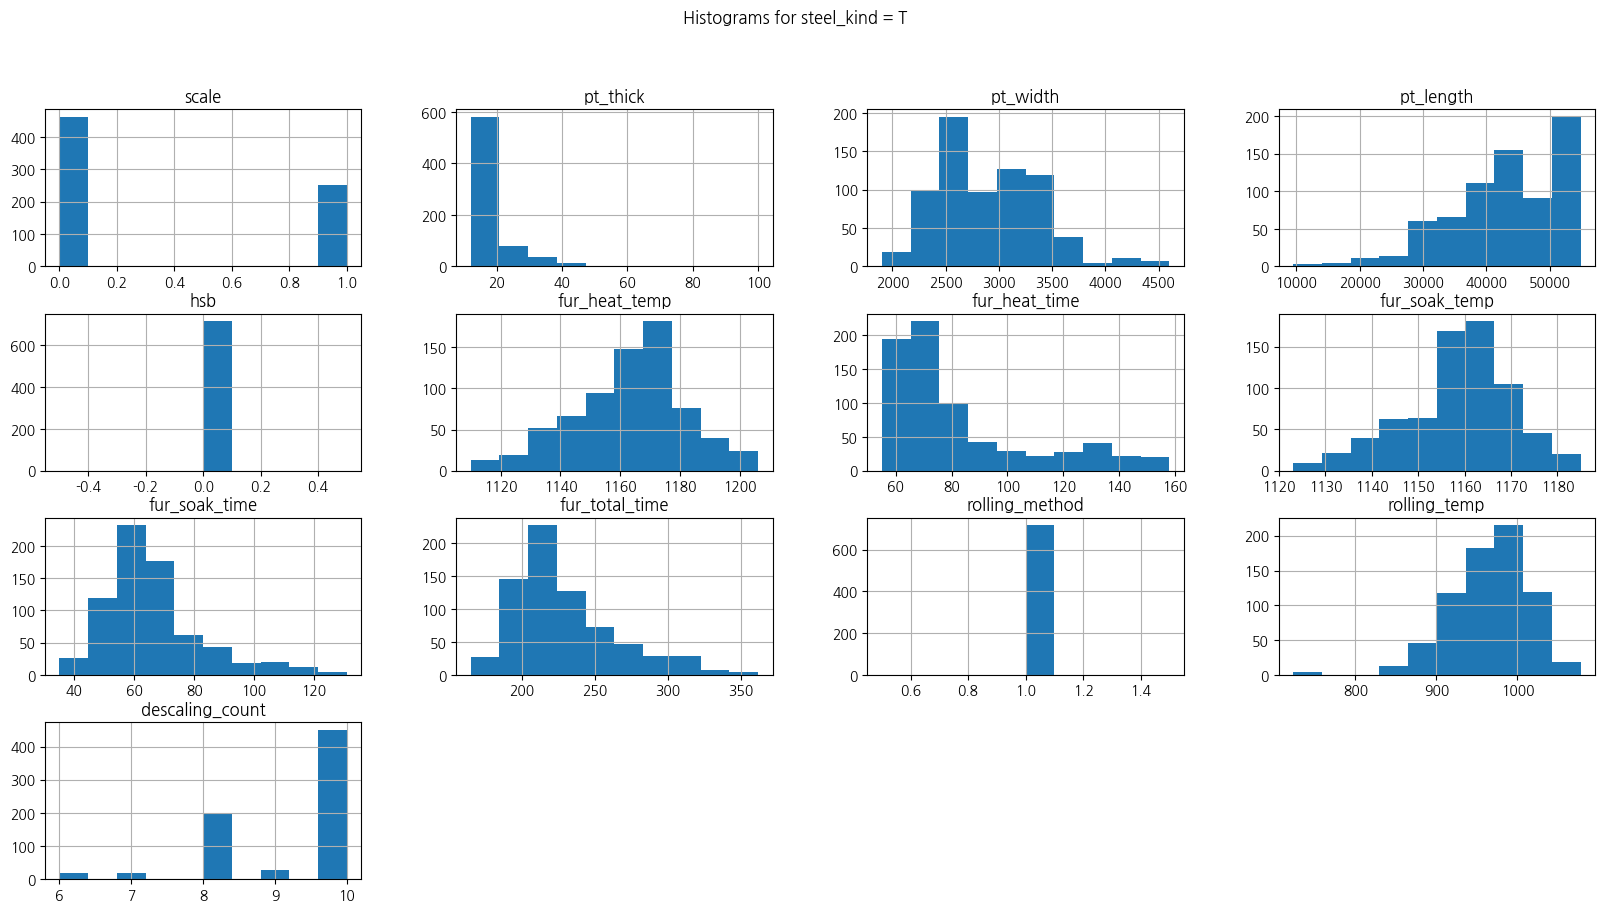

In [32]:
# Filter the data for steel_kind 'C'
df_raw_T = df_raw[df_raw['steel_kind'] == 'T']

# Plot histograms for the filtered data - steel_kind 'C'
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
df_raw_C.hist(figsize=(20, 10))
plt.suptitle('Histograms for steel_kind = T')
plt.show()

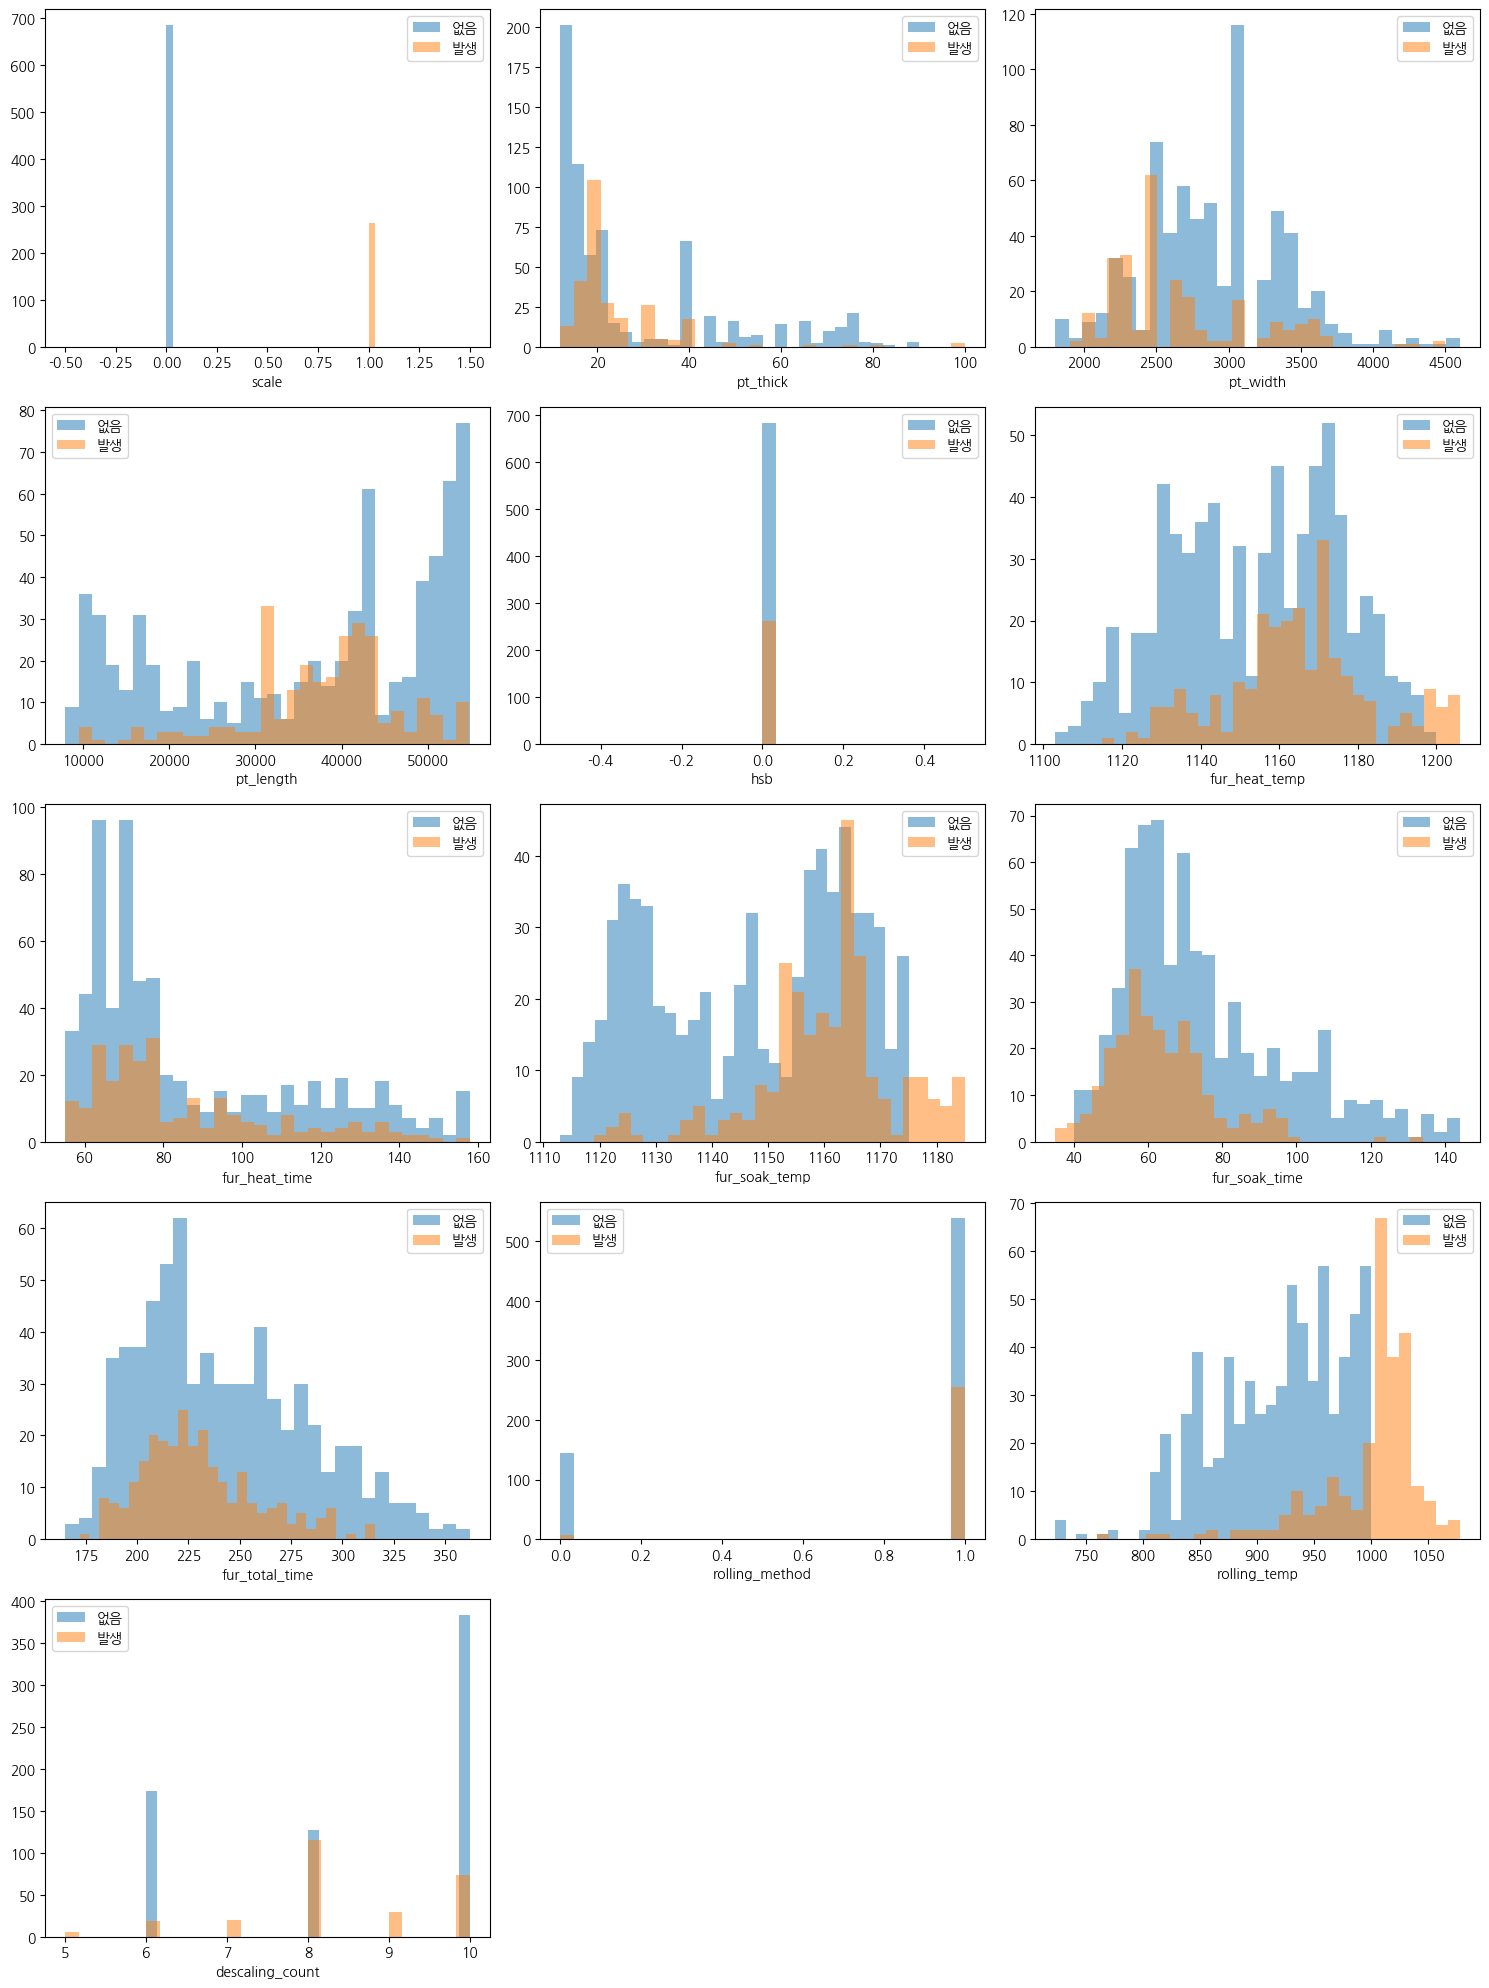

In [33]:
import matplotlib.pyplot as plt

# 연속형 변수만 선택
df_raw_numeric = df_raw.select_dtypes(include=[np.number])

# 서브플롯을 위한 설정
plt.figure(figsize=(15, 20))
i = 1

# 각 연속형 변수에 대해 히스토그램 생성
for col in df_raw_numeric.columns:
    plt.subplot(df_raw_numeric.shape[1]//3 + 1, 3, i)
    plt.hist(df_raw[df_raw["scale"] == 0][col].dropna(), label="없음", alpha=0.5, bins=30)
    plt.hist(df_raw[df_raw["scale"] == 1][col].dropna(), label="발생", alpha=0.5, bins=30)
    plt.xlabel(col)
    plt.legend()
    i += 1

plt.tight_layout()
plt.show()

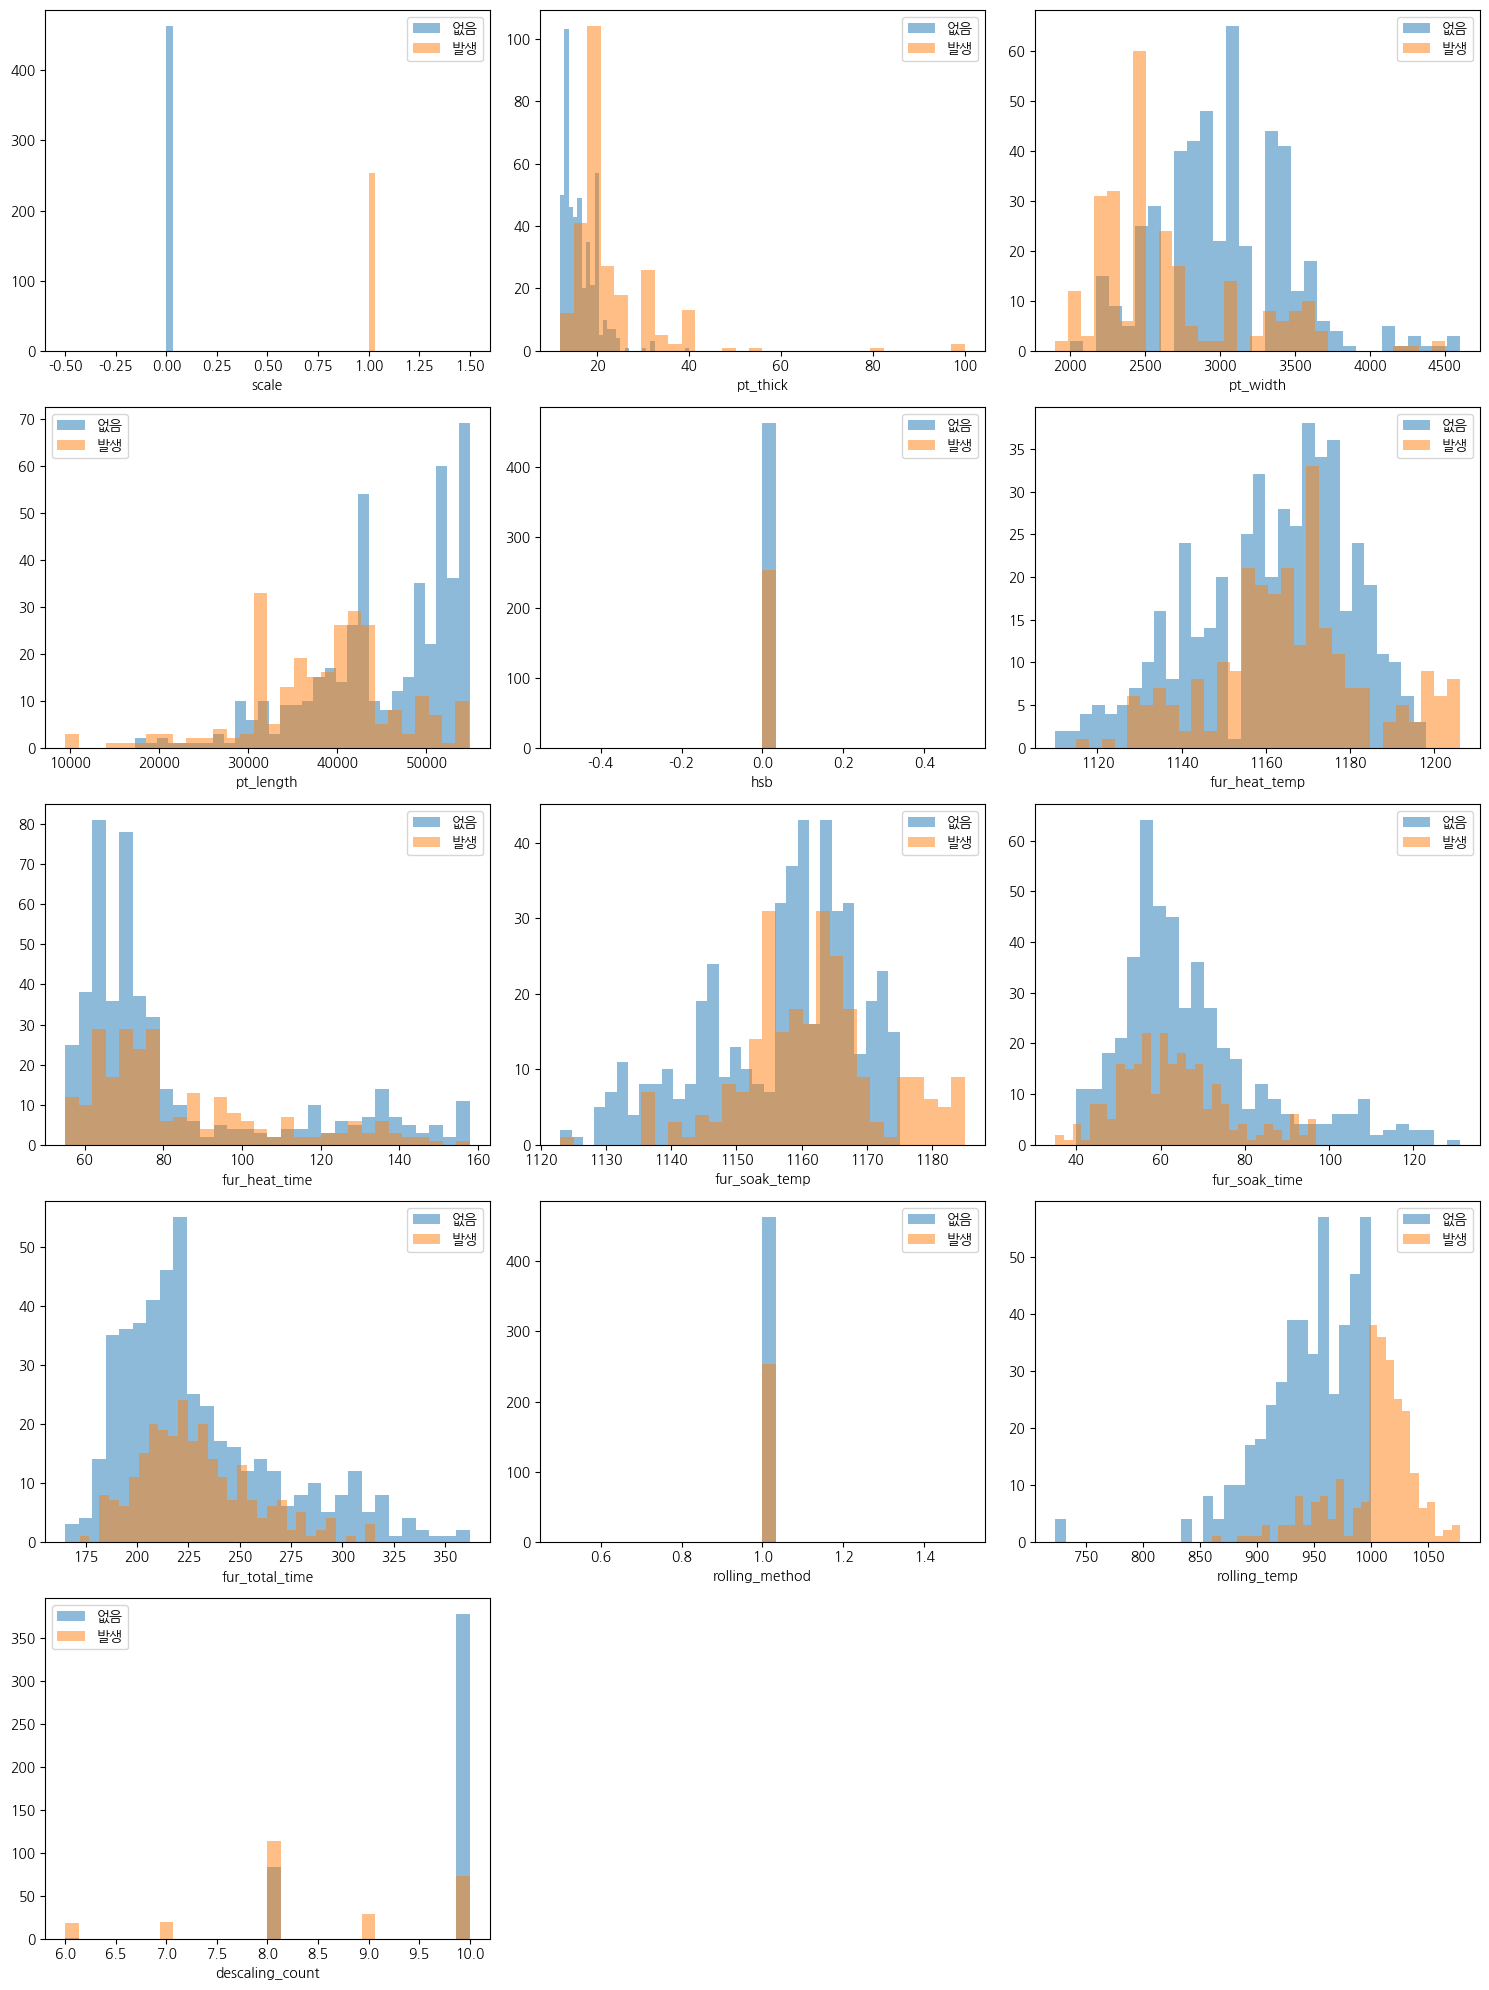

In [34]:
import matplotlib.pyplot as plt

# 연속형 변수만 선택
df_raw_C_numeric = df_raw_C.select_dtypes(include=[np.number])

# 서브플롯을 위한 설정
plt.figure(figsize=(15, 20))
i = 1

# 각 연속형 변수에 대해 히스토그램 생성
for col in df_raw_C_numeric.columns:
    plt.subplot(df_raw_C_numeric.shape[1]//3 + 1, 3, i)
    plt.hist(df_raw_C[df_raw_C["scale"] == 0][col].dropna(), label="없음", alpha=0.5, bins=30)
    plt.hist(df_raw_C[df_raw_C["scale"] == 1][col].dropna(), label="발생", alpha=0.5, bins=30)
    plt.xlabel(col)
    plt.legend()
    i += 1

plt.tight_layout()
plt.show()

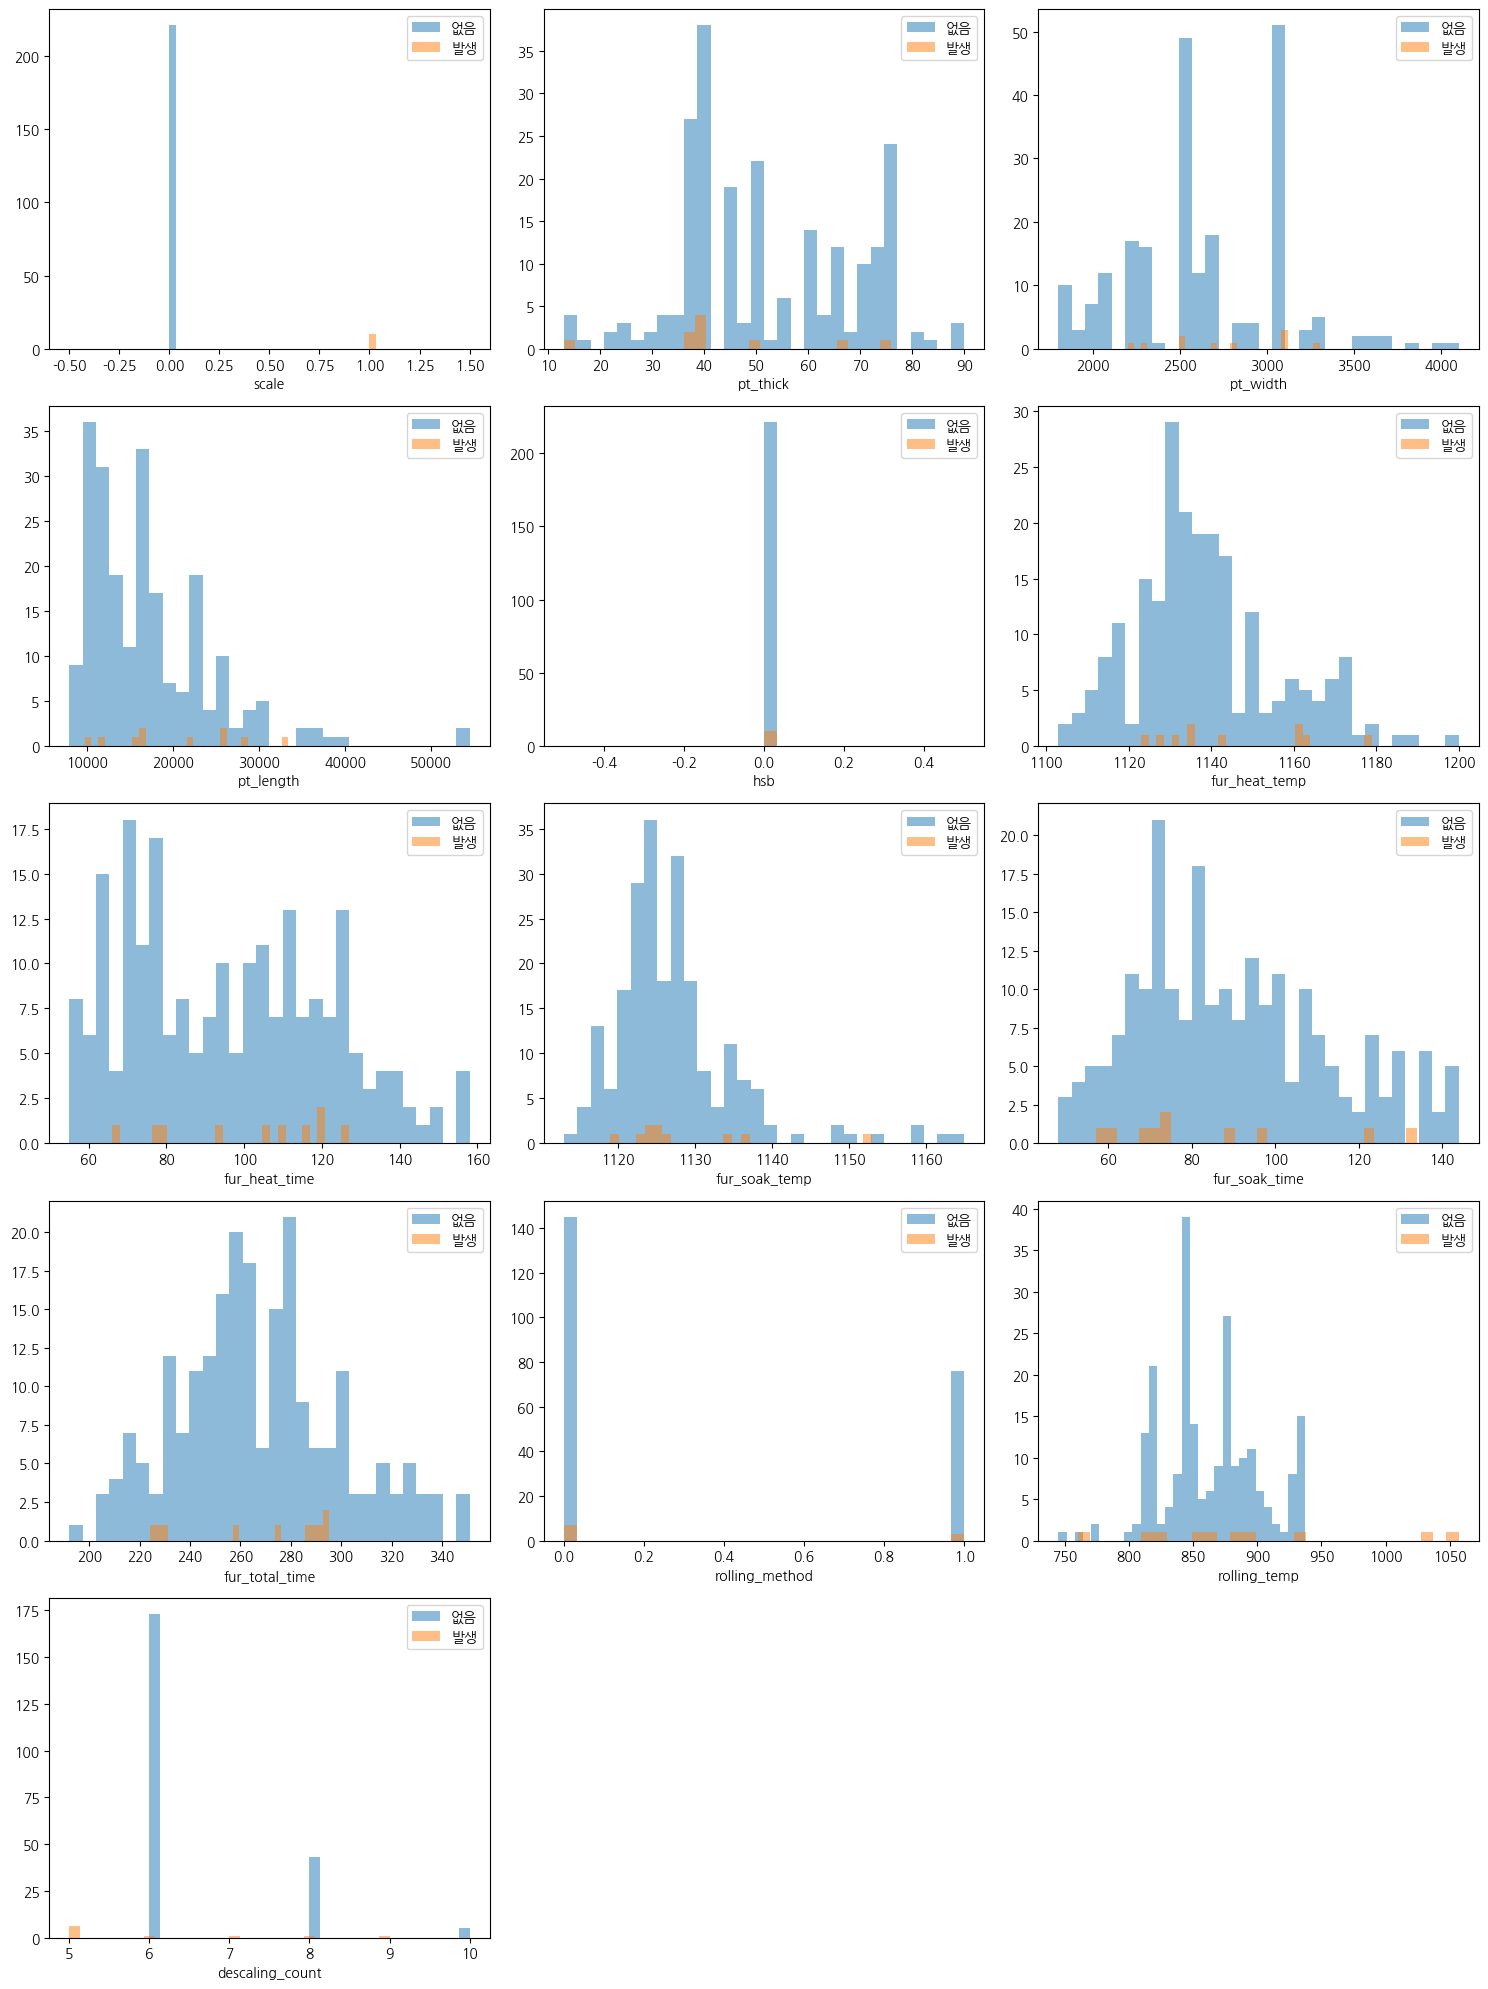

In [35]:
import matplotlib.pyplot as plt

# 연속형 변수만 선택
df_raw_T_numeric = df_raw_T.select_dtypes(include=[np.number])

# 서브플롯을 위한 설정
plt.figure(figsize=(15, 20))
i = 1

# 각 연속형 변수에 대해 히스토그램 생성
for col in df_raw_T_numeric.columns:
    plt.subplot(df_raw_T_numeric.shape[1]//3 + 1, 3, i)
    plt.hist(df_raw_T[df_raw_T["scale"] == 0][col].dropna(), label="없음", alpha=0.5, bins=30)
    plt.hist(df_raw_T[df_raw_T["scale"] == 1][col].dropna(), label="발생", alpha=0.5, bins=30)
    plt.xlabel(col)
    plt.legend()
    i += 1

plt.tight_layout()
plt.show()

# 분석한 결과/ T강 자체가 불량률이 적어 전체 불량률이랑 C강이랑 그래프가 같은 경향이 보인다(descailing 제외) 그래서 T강이랑 전체 강 2개만 층별화 하면 될듯
(두께)
- 탄소강이 두께가 얇은 경향이있는데 탄소강은 두꼐가 두꺼워질수록 내부 응력과 불균일성이 증가 할 가능성이 높다.
- 한편 티타늄강은 얇고 안정적인 산화막이 있기 떄문에 추가적인 보호 조치가 되어 두꼐 다양성이 크다. 
(넓이)
- 티타늄은 철에 비해 매우 비싼 금속 자원 절약하기 위해 작은 후판 선호, 특수한 응용분야에서 사용, 가공이 어려움
- 탄소강은 교량 빌딩 선박 압력용기 산업용 장비 대형구조물에 제작 많이 사용 넓은 면적 판재 넓은 후판이 경제정 공정의 단순화

In [36]:
df_raw.head()

,scale,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,0,T,32,3700,15100,0,1,1,1144,116,1133,59,259,0,934,8,1
1,0,T,32,3700,15100,0,1,2,1144,122,1135,53,238,0,937,8,1
2,0,T,33,3600,19200,0,2,1,1129,116,1121,55,258,0,889,8,1
3,0,T,33,3600,19200,0,2,2,1152,125,1127,68,266,0,885,8,1
4,0,T,38,3100,13300,0,3,1,1140,134,1128,48,246,0,873,8,1


In [37]:
df_raw.describe()

,scale,pt_thick,pt_width,pt_length,hsb,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count
count,947.000000,947.000000,947.000000,947.000000,947.0,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,0.277719,26.674762,2830.517423,36755.121436,0.0,1157.199578,86.174234,1150.885956,71.695882,238.662091,0.839493,940.630412,8.546990
std,0.448111,17.829170,492.639316,13877.501780,0.0,21.165993,26.384141,17.299919,20.625125,38.035616,0.367269,64.271068,1.598314
min,0.000000,12.000000,1800.000000,7900.000000,0.0,1103.000000,55.000000,1113.000000,35.000000,165.000000,0.000000,723.000000,5.000000
25%,0.000000,15.000000,2500.000000,26450.000000,0.0,1140.000000,66.000000,1136.000000,57.000000,210.000000,1.000000,894.000000,8.000000
50%,0.000000,20.000000,2800.000000,40300.000000,0.0,1159.000000,75.000000,1156.000000,66.000000,230.000000,1.000000,949.000000,9.000000
75%,1.000000,34.000000,3100.000000,49100.000000,0.0,1172.000000,103.000000,1164.000000,81.000000,263.000000,1.000000,993.000000,10.000000
max,1.000000,100.000000,4600.000000,54900.000000,0.0,1206.000000,158.000000,1185.000000,144.000000,362.000000,1.000000,1078.000000,10.000000


<Axes: >

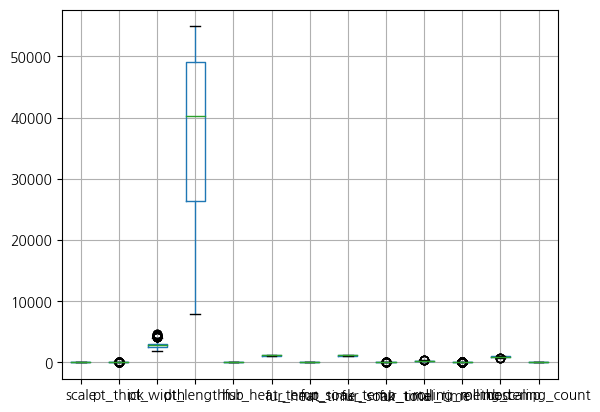

In [38]:
df_raw.boxplot()

array([[<Axes: title={'center': 'scale'}>,
        <Axes: title={'center': 'pt_thick'}>,
        <Axes: title={'center': 'pt_width'}>,
        <Axes: title={'center': 'pt_length'}>],
       [<Axes: title={'center': 'hsb'}>,
        <Axes: title={'center': 'fur_heat_temp'}>,
        <Axes: title={'center': 'fur_heat_time'}>,
        <Axes: title={'center': 'fur_soak_temp'}>],
       [<Axes: title={'center': 'fur_soak_time'}>,
        <Axes: title={'center': 'fur_total_time'}>,
        <Axes: title={'center': 'rolling_method'}>,
        <Axes: title={'center': 'rolling_temp'}>],
       [<Axes: title={'center': 'descaling_count'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

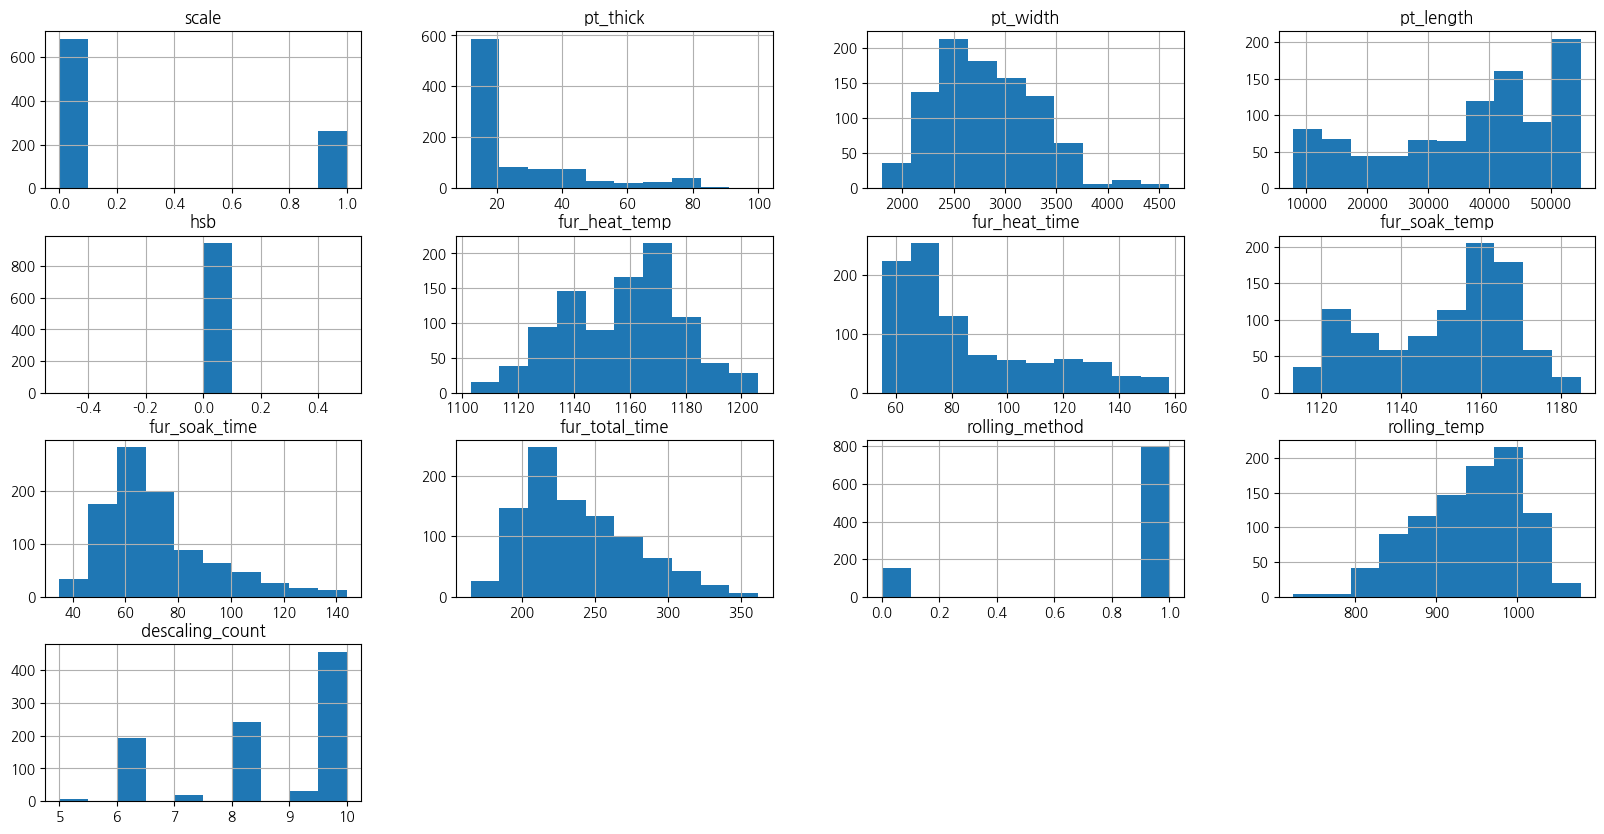

In [39]:
df_raw.hist(figsize=(20,10))

#### (pt_thick) 얇은 판재가 선호되는 것 같은데 소재에 따라 다를거같음(강종별 차이...)

Text(0.5, 0.98, 'Histograms for steel_kind = T')

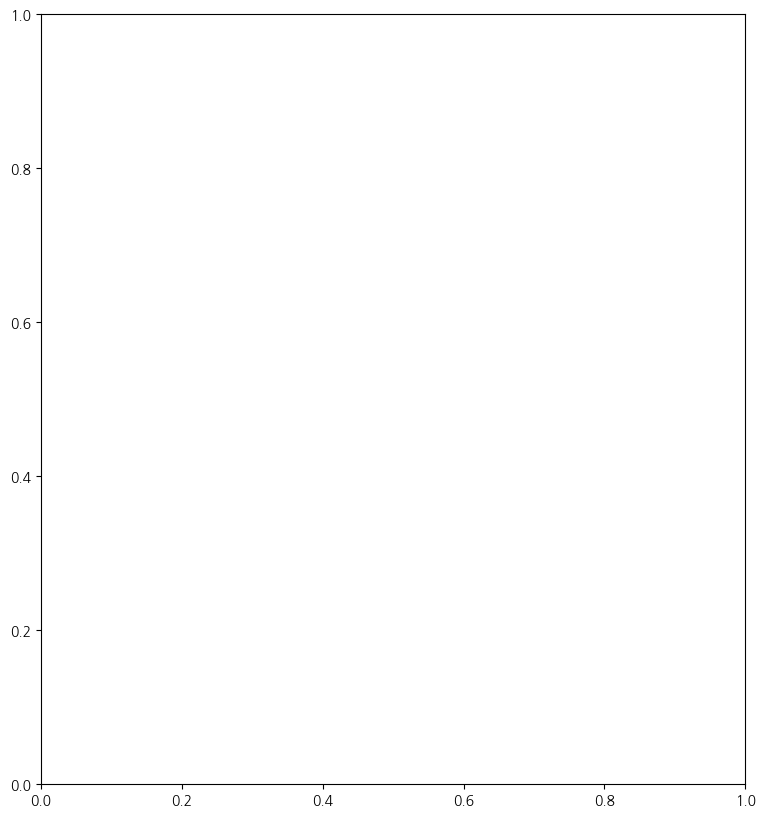

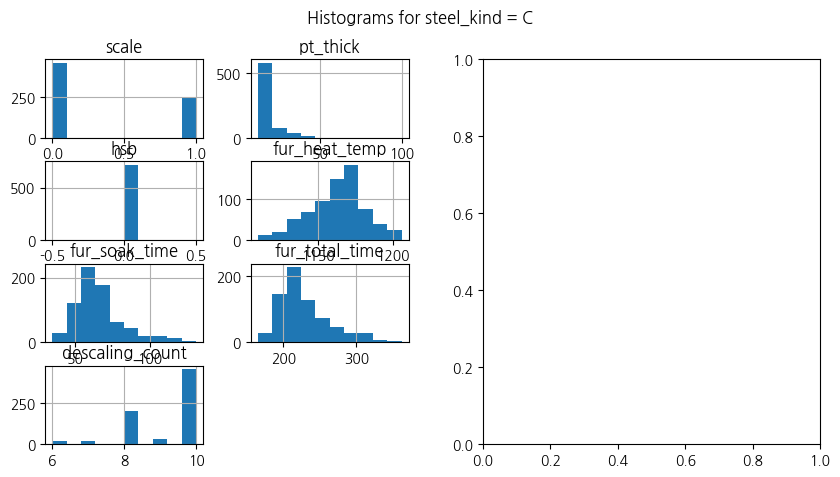

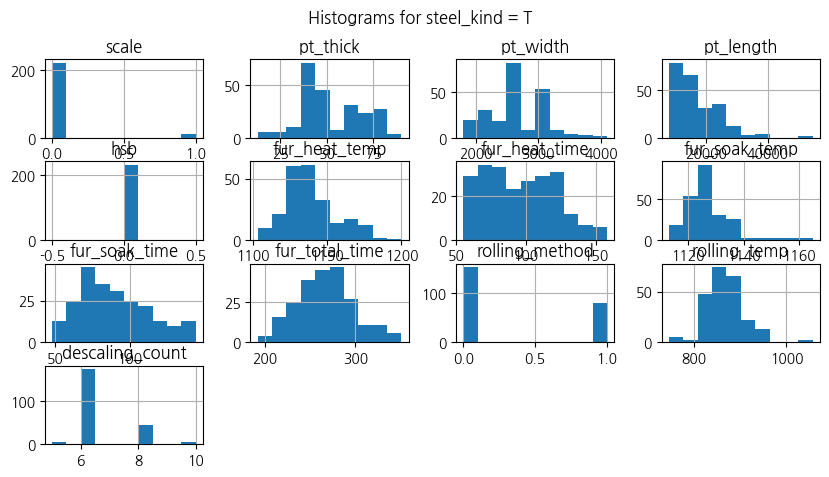

In [40]:
df_raw_C = df_raw[df_raw['steel_kind'] == 'C']
df_raw_T = df_raw[df_raw['steel_kind'] == 'T']

# Plot histograms for the filtered data
plt.figure(figsize=(20, 10))

# Histograms for 'C' steel_kind
plt.subplot(1, 2, 1)
df_raw_C.hist(figsize=(10, 5))
plt.suptitle('Histograms for steel_kind = C')

# Histograms for 'T' steel_kind
plt.subplot(1, 2, 2)
df_raw_T.hist(figsize=(10, 5))
plt.suptitle('Histograms for steel_kind = T')

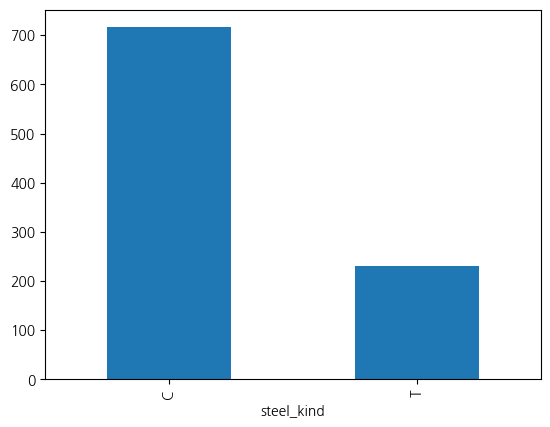

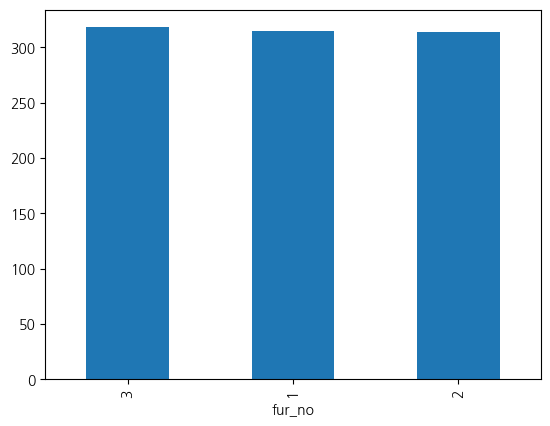

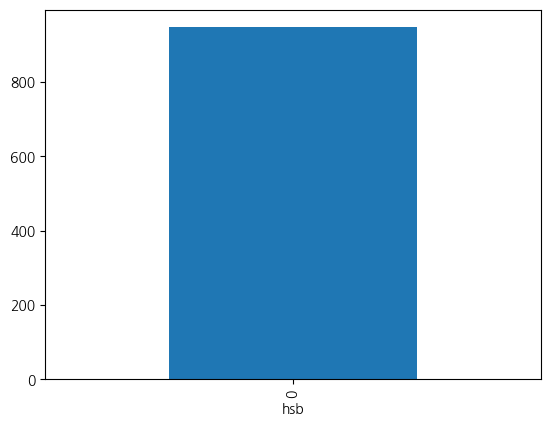

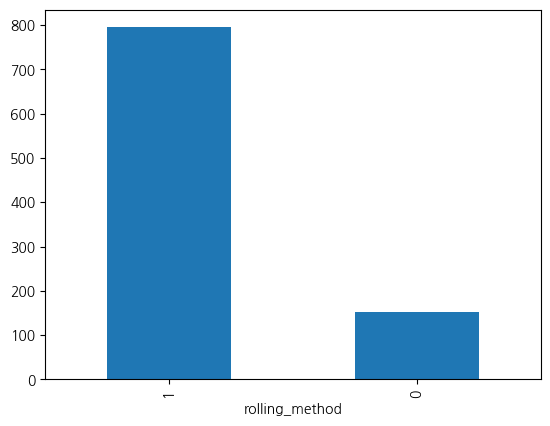

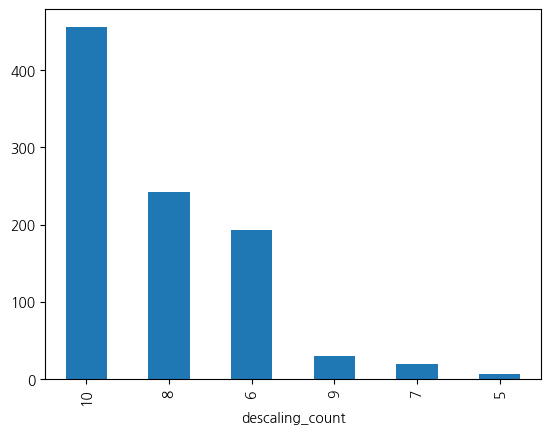

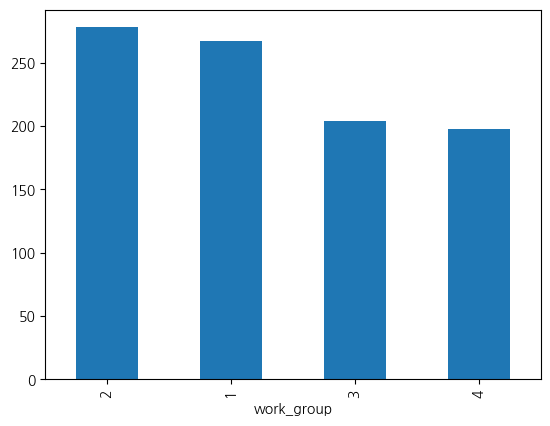

In [41]:
character_columns_list = ["steel_kind","fur_no","hsb","rolling_method","descaling_count","work_group"]

for i in character_columns_list :
  df_raw_count = df_raw[i].value_counts()
  df_raw_count.plot.bar()
  plt.xlabel(i)
  plt.show()

### 파생변수

1.판의 넓이 (area)
    계산 방법: 판의 넓이 = pt_width * pt_length

In [42]:
#area 와 scale의 관계성
df_raw['area'] = df_raw['pt_width']*df_raw['pt_length']

# 새로 생성된 열을 포함한 데이터프레임의 상위 5개 행을 출력
df_raw[['pt_width', 'pt_length', 'area']].head()


,pt_width,pt_length,area
0,3700,15100,55870000
1,3700,15100,55870000
2,3600,19200,69120000
3,3600,19200,69120000
4,3100,13300,41230000


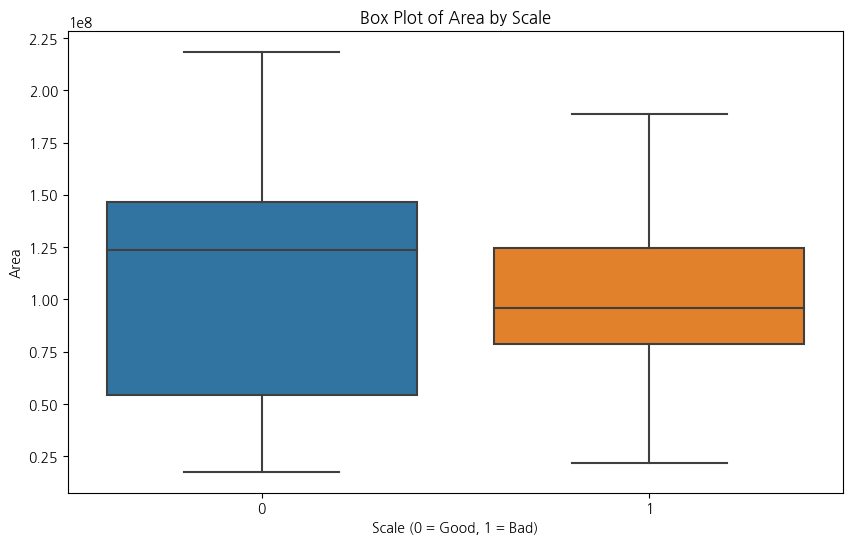

In [43]:
# scale 값에 따른 area의 분포를 박스 플롯으로 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='scale', y='area', data=df_raw)
plt.title('Box Plot of Area by Scale')
plt.xlabel('Scale (0 = Good, 1 = Bad)')
plt.ylabel('Area')
plt.show()

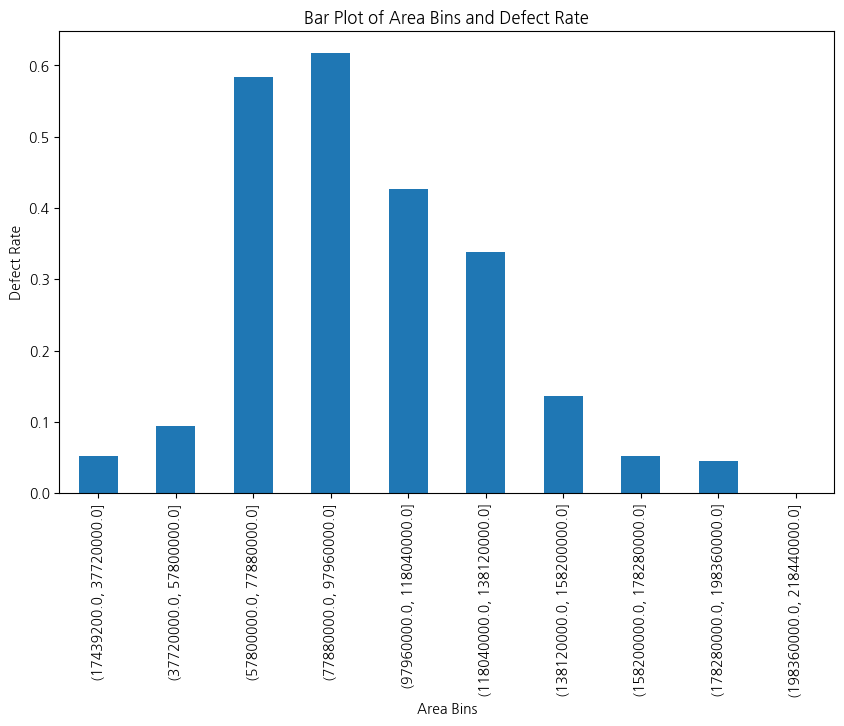

In [44]:
df_raw['area_bins'] = pd.cut(df_raw['area'], bins=10)
area_scale_rate = df_raw.groupby('area_bins')['scale'].mean()

# 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
area_scale_rate.plot(kind='bar')
plt.title('Bar Plot of Area Bins and Defect Rate')
plt.xlabel('Area Bins')
plt.ylabel('Defect Rate')
plt.show()

특정 구역 제외하고 면적이 작을수록 불량률이 높은 경향이 있다. 이는 생산공정에서 판의 면적이 불량에 중요한 
영향을 미친다는 것을 나타낸다
- 열 분포: 큰 면적을 가진 판은 열이 고르게 분포되기 어렵기 때문에, 열 처리 과정에서 불균형이 발생할 수 있습니다.
- 응력 집중: 면적이 작은 판은 기계적 응력의 집중이 발생할 가능성이 있습니다. 이러한 응력 집중은 판의 표면에 결함을 유발하고, 결과적으로 스케일 불량의 발생을 촉진할 수 있습니다.
- 완전작은 판은 더 정밀하게 관리되고 응력분포가 오히려 더 균일해 작을 수도 있다
- ???: 작은판은 예외로 두고 관계파악하면 안되나

2.가열로 총 재로시간 분에 가열대 재로시간(분)

In [45]:
# 가열로 총 재로시간 분에 가열대 재로시간(분)
df_raw['fur_heat_ratio'] = df_raw['fur_heat_time'] / df_raw['fur_total_time']

# 새로 생성된 파생변수의 상위 5개 행을 확인
print(df_raw[['fur_heat_time', 'fur_total_time', 'fur_heat_ratio']].head())

   fur_heat_time  fur_total_time  fur_heat_ratio
0            116             259        0.447876
1            122             238        0.512605
2            116             258        0.449612
3            125             266        0.469925
4            134             246        0.544715


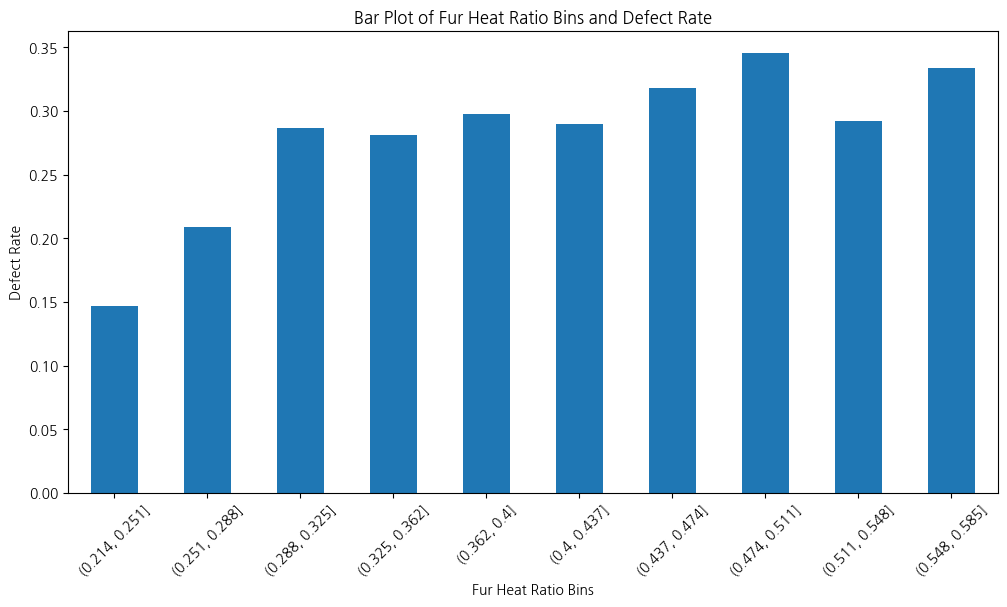

In [46]:
# fur_heat_ratio를 구간으로 나누기 (예: 10개의 동일한 크기 구간으로 나누기)
df_raw['fur_heat_ratio_bins'] = pd.cut(df_raw['fur_heat_ratio'], bins=10)

# 각 구간별로 scale의 평균값(불량률) 계산
mean_scale_by_heat_ratio = df_raw.groupby('fur_heat_ratio_bins')['scale'].mean()

# 막대 그래프로 시각화
plt.figure(figsize=(12, 6))
mean_scale_by_heat_ratio.plot(kind='bar')
plt.title('Bar Plot of Fur Heat Ratio Bins and Defect Rate')
plt.xlabel('Fur Heat Ratio Bins')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.show()

가열로 시간이 길어질수록 불량률이 높은이유는 금속의 표면이 고온에 오랫동안 노출되어서

3. 활성화에너지

In [47]:
# 활성화 에너지 계산 (예: 임의의 공식 사용)
R = 8.314  # 기체 상수 (J/mol·K)
df_raw['activation_energy'] = R * (df_raw['fur_soak_temp'] + 273.15) * np.log(df_raw['fur_soak_time'] + 1)

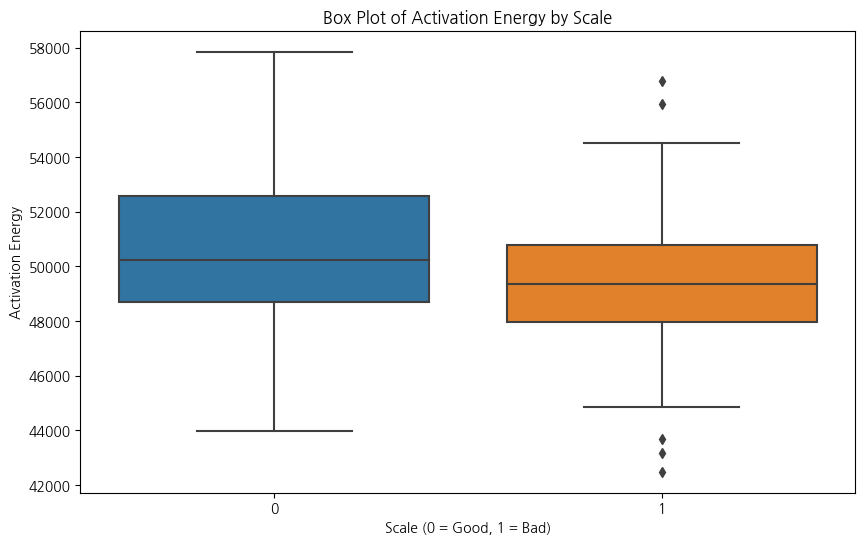

In [48]:

# 활성화 에너지와 scale 간의 관계를 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='scale', y='activation_energy', data=df_raw)
plt.title('Box Plot of Activation Energy by Scale')
plt.xlabel('Scale (0 = Good, 1 = Bad)')
plt.ylabel('Activation Energy')
plt.show()


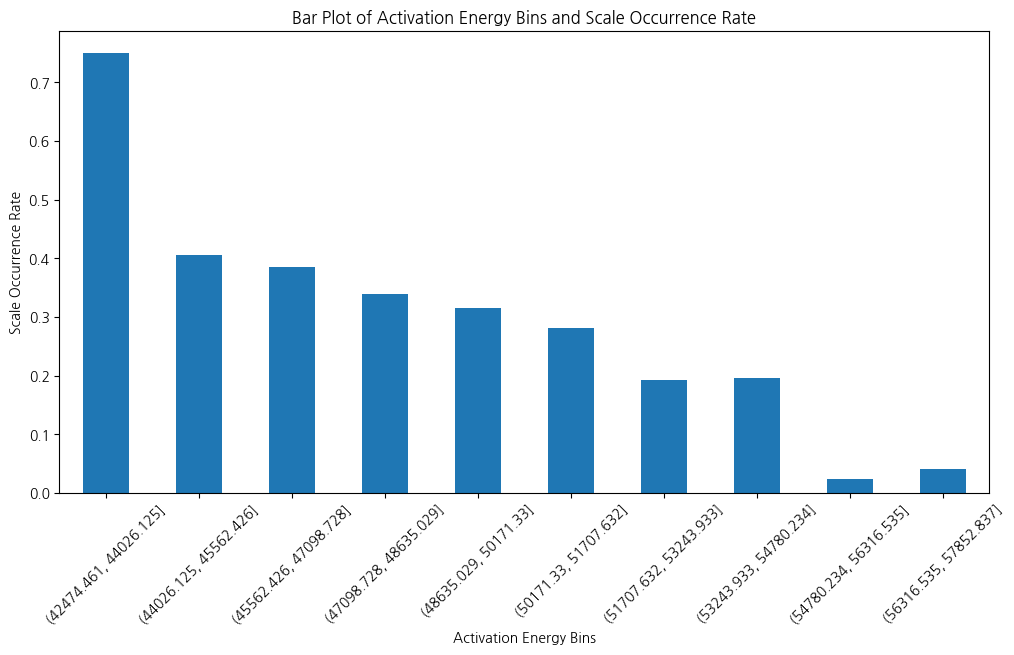

In [49]:
# 활성화 에너지를 구간화하여 scale과의 관계를 막대 그래프로 시각화
df_raw['activation_energy_bins'] = pd.cut(df_raw['activation_energy'], bins=10)
mean_scale_by_energy = df_raw.groupby('activation_energy_bins')['scale'].mean()

plt.figure(figsize=(12, 6))
mean_scale_by_energy.plot(kind='bar')
plt.title('Bar Plot of Activation Energy Bins and Scale Occurrence Rate')
plt.xlabel('Activation Energy Bins')
plt.ylabel('Scale Occurrence Rate')
plt.xticks(rotation=45)
plt.show()

활성화에너지에 가열로 균열대 소재온도를 넣은 이유는 활성화에너지는 특정화학반응이나 물리적 변화가 일어나기 위해 필요한 최소한의 에너지를 의미해 균열대 소재온도도 물리적 변화가 일어나기 때문에 넣었습니다.
가열로 균열대 소재온도(fur_heat_temp)가 활성화 에너지와 중요한 관계를 가지는 이유는, 온도가 화학 반응의 속도를 결정짓는 주요 변수이기 때문입니다. 
(가열로 가열대 소재온도 안되는 이유)가열로 가열대 소재온도와 활성화 에너지 간의 관계가 명확하지 않은 이유는 모델링의 부적합성, 중요한 변수의 누락, 데이터의 한계, 공정 조건의 불균일성 등 여러 요인에 의해 설명될 수 있습니다. 
# 금속이 고온에서 산화될 때, 산소와 금속 원자가 결합하여 산화물이 형성됩니다. 이 과정에서 필요한 에너지가 활성화 에너지입니다. 특정 금속이나 합금의 활성화 에너지가 낮을수록 산화 반응이 더 쉽게 일어나고, 고온에서 더 많은 스케일이 형성될 수 있습니다.

### 가설 설정

1.가열로 가열대 온도가 높을수록 scale 발생확률이 높다.

In [50]:
# 가열대 온도와 scale 간의 상관계수 계산
correlation = df_raw['fur_heat_temp'].corr(df_raw['scale'])
print(f"Correlation between Fur Heat temperature and Scale: {correlation}")

Correlation between Fur Heat temperature and Scale: 0.22920068620534303


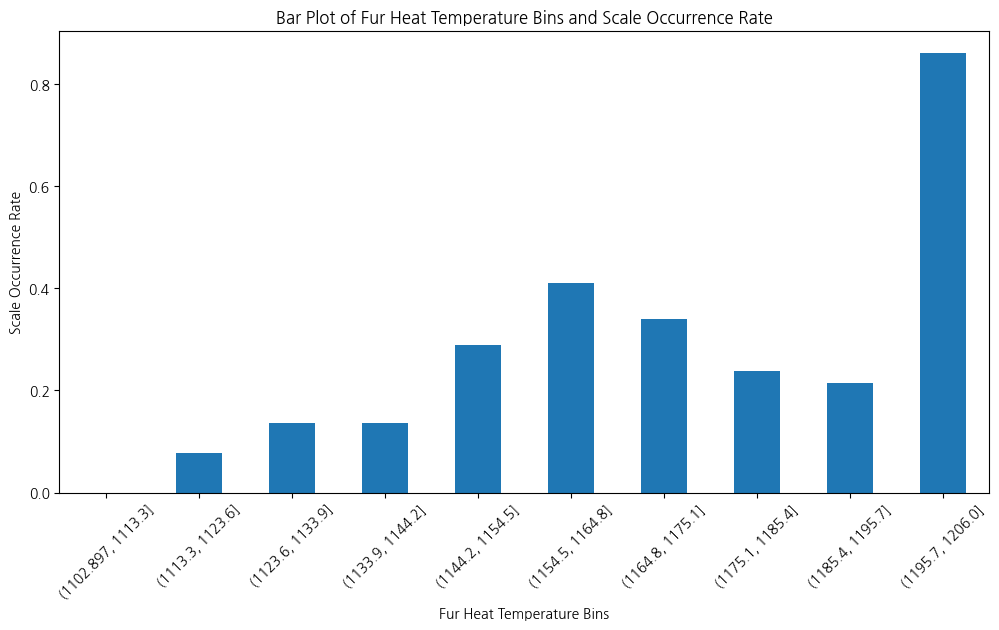

In [51]:
# 가열대 온도를 구간으로 나누기 (예: 10개의 동일한 크기 구간으로 나누기)
df_raw['temp_bins'] = pd.cut(df_raw['fur_heat_temp'], bins=10)

# 각 구간별로 scale의 평균값(불량률) 계산
mean_scale_by_temp = df_raw.groupby('temp_bins')['scale'].mean()

# 막대 그래프로 시각화
plt.figure(figsize=(12, 6))
mean_scale_by_temp.plot(kind='bar')
plt.title('Bar Plot of Fur Heat Temperature Bins and Scale Occurrence Rate')
plt.xlabel('Fur Heat Temperature Bins')
plt.ylabel('Scale Occurrence Rate')
plt.xticks(rotation=45)
plt.show()

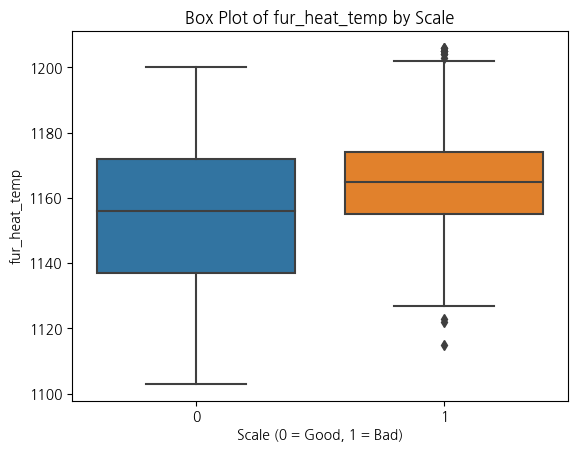

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='scale', y='fur_heat_temp', data=df_raw)
plt.title('Box Plot of fur_heat_temp by Scale')
plt.xlabel('Scale (0 = Good, 1 = Bad)')
plt.ylabel('fur_heat_temp')
plt.show()

2.가열로 균열대 온도가 높을수록 scale 발생확률이 높다

In [53]:
correlation = df_raw['fur_soak_temp'].corr(df_raw['scale'])
print(f"Correlation between Fur Soak Temperature and Scale: {correlation}")

Correlation between Fur Soak Temperature and Scale: 0.3429385648302826


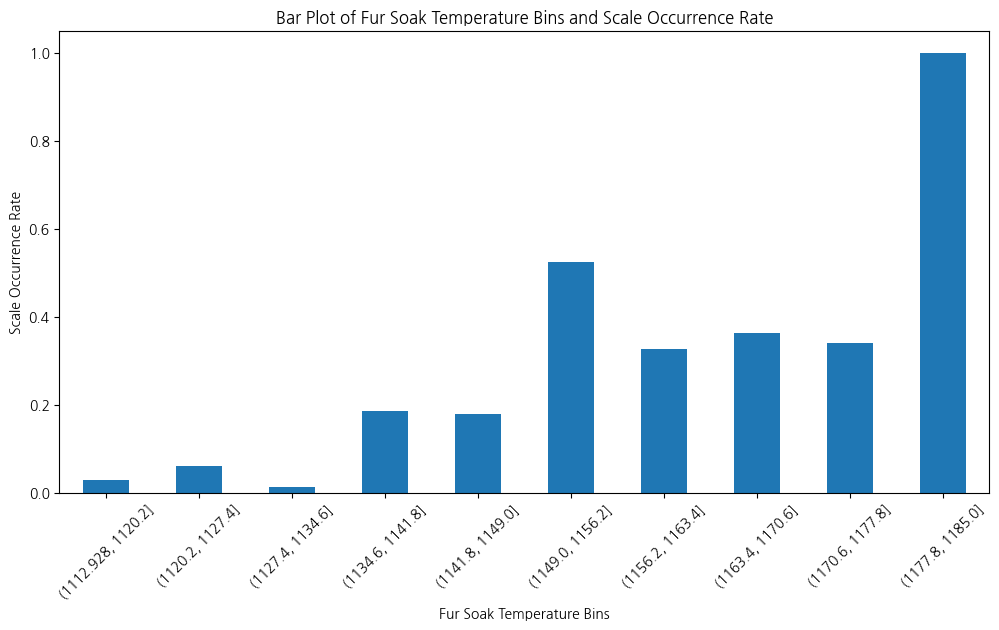

In [54]:
# 가열대 온도를 구간으로 나누기 (예: 10개의 동일한 크기 구간으로 나누기)
df_raw['temp_bins'] = pd.cut(df_raw['fur_soak_temp'], bins=10)

# 각 구간별로 scale의 평균값(불량률) 계산
mean_scale_by_temp = df_raw.groupby('temp_bins')['scale'].mean()

# 막대 그래프로 시각화
plt.figure(figsize=(12, 6))
mean_scale_by_temp.plot(kind='bar')
plt.title('Bar Plot of Fur Soak Temperature Bins and Scale Occurrence Rate')
plt.xlabel('Fur Soak Temperature Bins')
plt.ylabel('Scale Occurrence Rate')
plt.xticks(rotation=45)
plt.show()

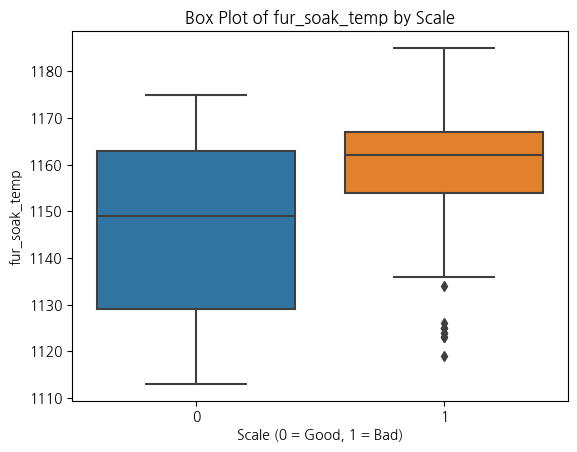

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='scale', y='fur_soak_temp', data=df_raw)
plt.title('Box Plot of fur_soak_temp by Scale')
plt.xlabel('Scale (0 = Good, 1 = Bad)')
plt.ylabel('fur_soak_temp')
plt.show()

3.사상 압연 온도가 높을수록 scale 발생 확률이 높다.

In [56]:
correlation = df_raw['rolling_temp'].corr(df_raw['scale'])
print(f"Correlation between rolling temp and Scale: {correlation}")

Correlation between rolling temp and Scale: 0.5603970815056596


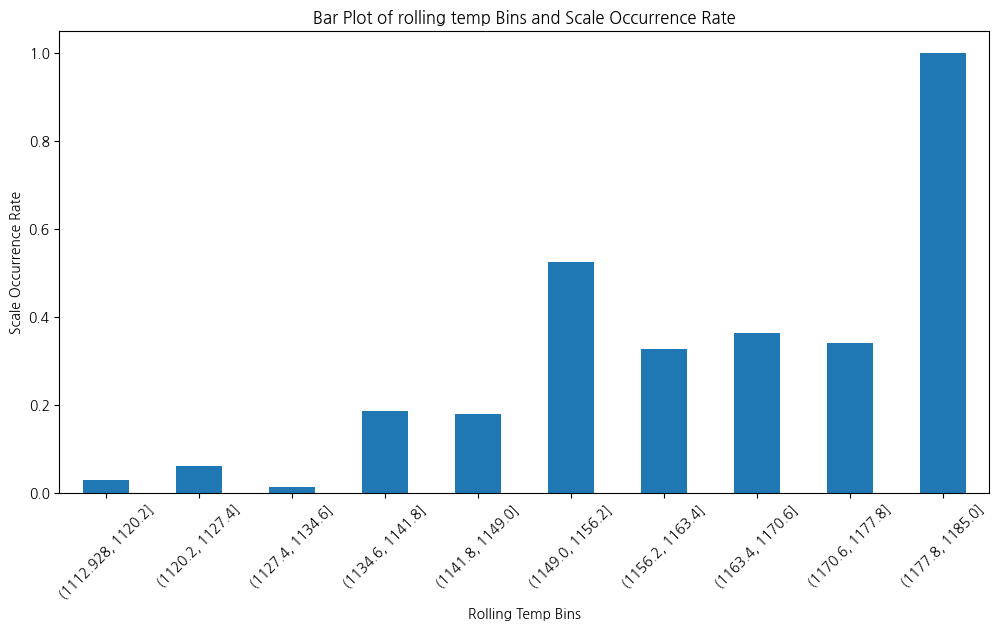

In [57]:
# 가열대 온도를 구간으로 나누기 (예: 10개의 동일한 크기 구간으로 나누기)
df_raw['temp_bins'] = pd.cut(df_raw['fur_soak_temp'], bins=10)

# 각 구간별로 scale의 평균값(불량률) 계산
mean_scale_by_temp = df_raw.groupby('temp_bins')['scale'].mean()

# 막대 그래프로 시각화
plt.figure(figsize=(12, 6))
mean_scale_by_temp.plot(kind='bar')
plt.title('Bar Plot of rolling temp Bins and Scale Occurrence Rate')
plt.xlabel('Rolling Temp Bins')
plt.ylabel('Scale Occurrence Rate')
plt.xticks(rotation=45)
plt.show()

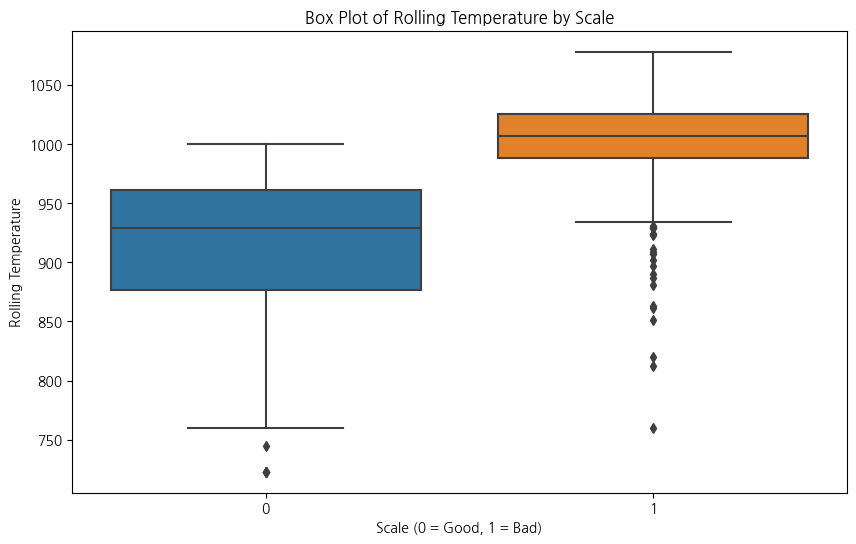

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.boxplot(x='scale', y='rolling_temp', data=df_raw)
plt.title('Box Plot of Rolling Temperature by Scale')
plt.xlabel('Scale (0 = Good, 1 = Bad)')
plt.ylabel('Rolling Temperature')
plt.show()


4.압연간 descailing 횟수가 높을수록 scale 발생확률이 낮다.

In [59]:
correlation = df_raw['descaling_count'].corr(df_raw['scale'])
print(f"Correlation between descailing count and Scale: {correlation}")

Correlation between descailing count and Scale: -0.06473142442536632


In [60]:
# 교차표 생성
crosstab = pd.crosstab(df_raw['descaling_count'], df_raw['scale'])
crosstab


scale,0,1
descaling_count,,
5,0,6
6,174,19
7,0,20
8,127,115
9,0,30
10,383,73


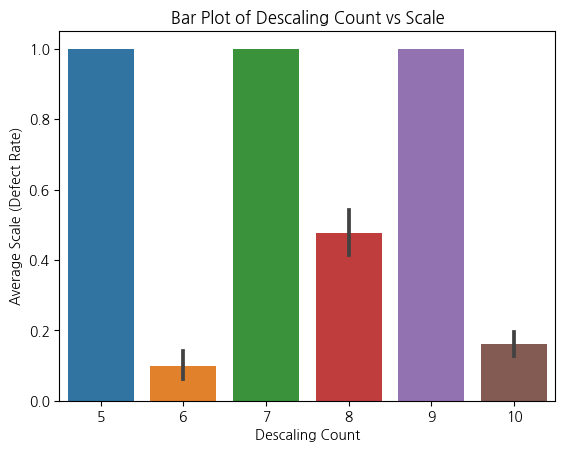

In [61]:
sns.barplot(x='descaling_count', y='scale', data=df_raw)
plt.title('Bar Plot of Descaling Count vs Scale')
plt.xlabel('Descaling Count')
plt.ylabel('Average Scale (Defect Rate)')
plt.show()

5.판 두께가 얇을수록 scale발생확률이 높다

In [62]:
correlation = df_raw['pt_thick'].corr(df_raw['scale'])
print(f"Correlation between pt_thick and Scale: {correlation}")

Correlation between pt_thick and Scale: -0.10141058419346241


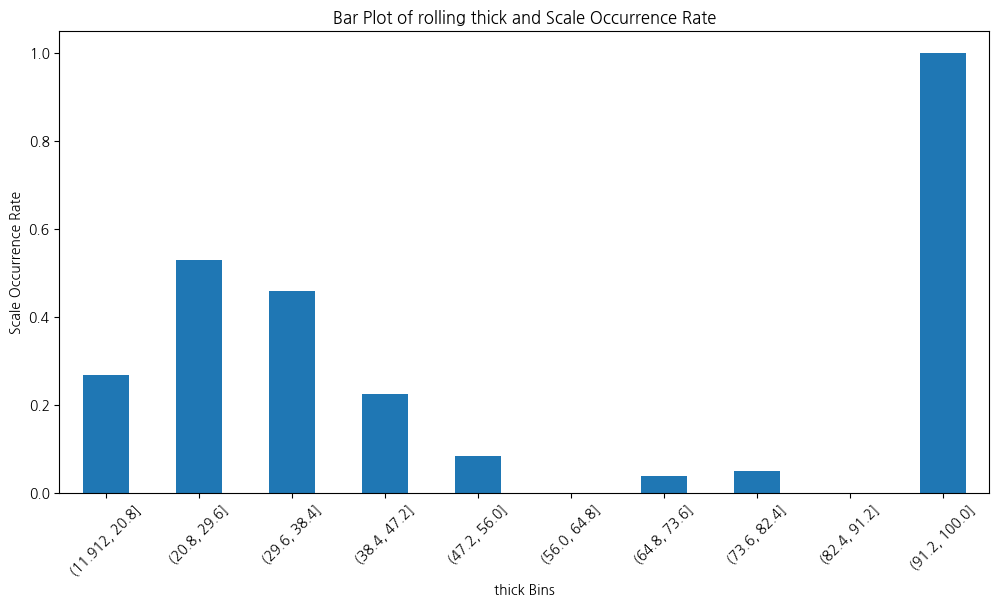

In [63]:
# 가열대 온도를 구간으로 나누기 (예: 10개의 동일한 크기 구간으로 나누기)
df_raw['thick_bins'] = pd.cut(df_raw['pt_thick'], bins=10)

# 각 구간별로 scale의 평균값(불량률) 계산
mean_scale_by_temp = df_raw.groupby('thick_bins')['scale'].mean()

# 막대 그래프로 시각화
plt.figure(figsize=(12, 6))
mean_scale_by_temp.plot(kind='bar')
plt.title('Bar Plot of rolling thick and Scale Occurrence Rate')
plt.xlabel('thick Bins')
plt.ylabel('Scale Occurrence Rate')
plt.xticks(rotation=45)
plt.show()

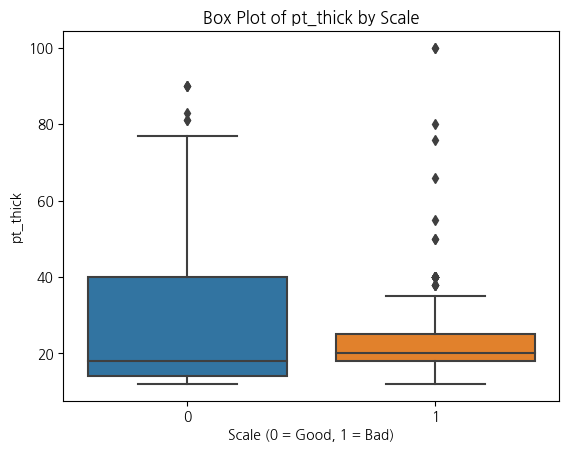

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='scale', y='pt_thick', data=df_raw)
plt.title('Box Plot of pt_thick by Scale')
plt.xlabel('Scale (0 = Good, 1 = Bad)')
plt.ylabel('pt_thick')
plt.show()

6. 티타늄에 생기는 스케일보다 탄소강에 생기는 스케일이 더 많은 descaling을 필요로 한다 -> descaling count는 C가 더 많다

In [65]:
# 교차표 생성
crosstab = pd.crosstab(df_raw['descaling_count'], df_raw['steel_kind'])
crosstab


steel_kind,C,T
descaling_count,,
5,0,6
6,19,174
7,19,1
8,198,44
9,29,1
10,451,5


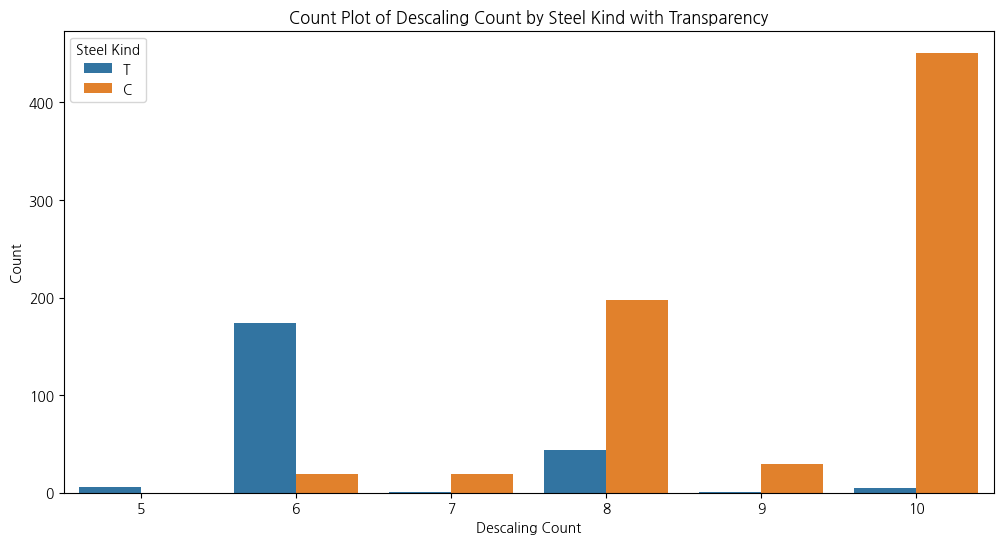

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# 하나의 그래프에 투명도를 조정하여 겹치는 카운트 플롯 생성
plt.figure(figsize=(12, 6))
sns.countplot(x='descaling_count', hue='steel_kind', data=df_raw, dodge=True)
plt.title('Count Plot of Descaling Count by Steel Kind with Transparency')
plt.xlabel('Descaling Count')
plt.ylabel('Count')
plt.legend(title='Steel Kind')
plt.show()

7. [가정] 제어압연(T) / 온도제어압연(C) 중 제어압연이 "공정 특성 상" 스케일이 더 많이 생긴다

    가정 1. 제어압연이 빠르고 싸고 대량생산에 더 적합
    가정 2. 온도제어압연은 스케일에 강함?
    
    제어압연(T)과 온도제어압연(C) 간의 스케일 발생 빈도를 비교한 결과 
    1. 제어압연(T)의 스케일 발생 빈도가 상대적으로 낮다.
    2. 온도제어압연(C)에서 더 높은 빈도로 스케일이 발생하고 있다.
    
    
    
스케일 발생 빈도
- 제어압연(T)에서는 스케일 발생 빈도가 6에서 높게 나타나지만 다른 값에서는 거의 발생 x
- 온도제어압연(C)에서는 스케일 발생 빈도가 10에서 매우 높게 나타남


[가정 검토]
가정0.은 관찰된 데이터와 불일치 -> 온도제어압연(C)에서 더 높은 스케일 발생 빈도 관찰(10)
가정1.은 "스케일 발생 빈도"와 직접적인 연관 X을 수 있다. -> 공정 효율성과 비용에 대한 분석 필요(우리는 비용, 효율성 모두 자료 X)
가정2.는 온도제어압연(C)에서 더 높은 스케일 빈도가 나타나기 때문에(10) 가정 재검토
즉, 도메인의 "공정 특성 상"과 반대되는 결과 -> 다시 검토

[가정 재검토]
    제어압연(T)이 공정 특성상 스케일이 더 많이 생기고, 온도 제어압연(C)이 스케일에 강하다.
    1. 스케일 발생 정의 재검토
    스케일 발생 빈도를 단순한 카운트로만 보고 있다.(0, 1)
    스케일의 심각도(크기, 두께 뜽) 품질에 미치는 영향과 같은 추가적인 변수 고려
    단순히 발생 횟수만 보지 않고, 발생한 스케일의 성질을 분석함으로써 제어압연(T)이 더 불리한 경우 찾을 수 있음
    2. 다중 회귀 분석 또는 분산 분석(ANOVA) 
    -> 여러 변수를 동시에 고려하여 스케일 발생에 대한 영향을 정량적으로 분석
    -> 각 공정 변수가 스케일 발생에 미치는 영향을 독립적으로 평가
    3. 공정별 특성 분석
    
[가정이 데이터 결과와 일치하지 않은 가장 큰 원인]
공정 조건의 차이

제어압연과 온도제어압연이 동일하지 않은 조건(온도, 압력, 속도 등)에서 수행되었다면, 이러한 차이가 스케일 발생 빈도에 영향을 주어 가정과 다른 결과를 초래할 수 있음
각 공정이 다른 조건에서 운영되면, 이는 공정 특성보다 조건의 영향을 반영한 결과가 나타날 수 잇다. 즉, 제어압연(T)이 더 많은 스케일을 발생시킨다는 가정이 맞더라도, 온도제어압연(c)이 더 불리한 조건에서 수행되었다면 데이터는 그 가정을 반영하지 못 할 수 있다.

    

In [67]:
# 교차표 생성
crosstab = pd.crosstab(df_raw['rolling_method'], df_raw['scale'])
crosstab


scale,0,1
rolling_method,,
0,145,7
1,539,256


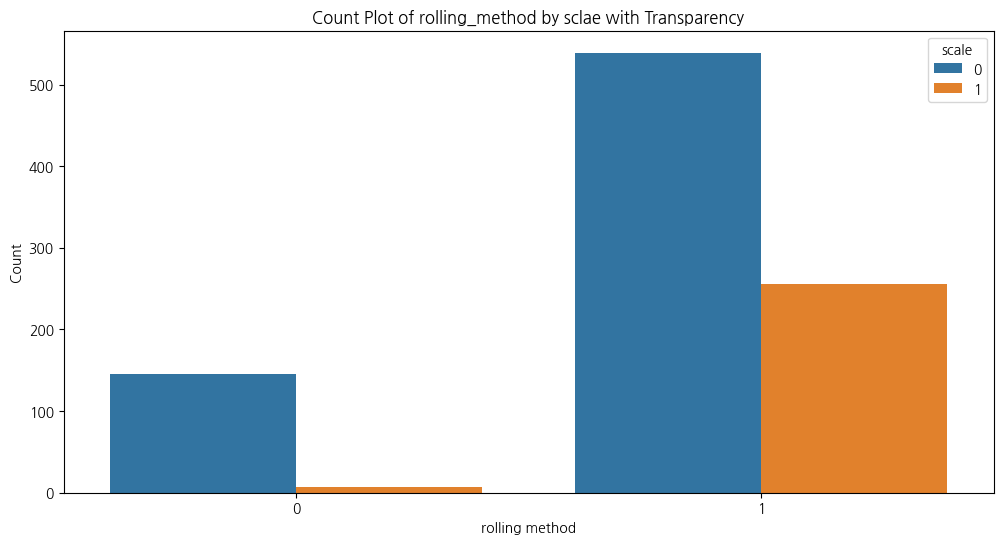

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# 하나의 그래프에 투명도를 조정하여 겹치는 카운트 플롯 생성
plt.figure(figsize=(12, 6))
sns.countplot(x='rolling_method', hue='scale', data=df_raw, dodge=True)
plt.title('Count Plot of rolling_method by sclae with Transparency')
plt.xlabel('rolling method')
plt.ylabel('Count')
plt.legend(title='scale')
plt.show()

8. 압연 공정 온도가 높을 수록 스케일이 많이 생긴다.
파랑 스케일 발생x
주왕 스케일 발생O
0번 낮은 온도
1번 높은 온도

1. 낮은 온도(0)에서는 스케일 발생하지 않은 경우(파)가 많으며, 스케일이 발생한 경우(주)는 거의 없다.
2. 높은 온도(1)에서는 스케일 발생하지 않는 경우(파)가 많으며, 스케일 발생한 경우(주)도 상당한 비중을 차지하고 있다.

[가정 검증]
높은 온도에서 스케일 발생 비율이 > 낮은 온도에서 스케일 발생 비율보다 높은 것을 보여줌.
즉, 높은 온도에서 스케일 발생이 더 빈번하게 나타날 것

가정은 따르지만 다른 환경 요인이 있는지 분석
1. 재료의 종류 및 성질 -> 다른 재료(C, T)는 같은 온도에서도 스케일 발생이 다르게 반응할 수 있다. 재료 특성에 따른 스케일 발생 차이 고려
2. 환경조건 -> 산화 분위기(산소의 농도, 산화성 가스 등이 스케일 발생에 영향을 줄 수 있다. 산화 분위기가 더 강하면 스케일이 더 두껍게 형성될 가능성이 있다.

In [69]:
correlation = df_raw['rolling_temp'].corr(df_raw['scale'])
print(f"Correlation between rolling_temp and Scale: {correlation}")

Correlation between rolling_temp and Scale: 0.5603970815056596


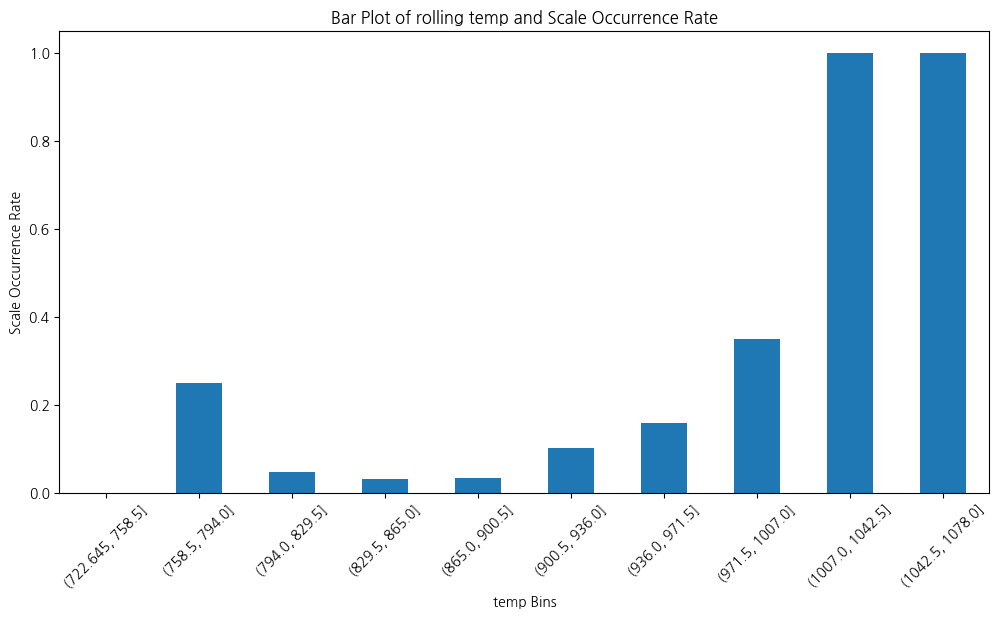

In [70]:
# 가열대 온도를 구간으로 나누기 (예: 10개의 동일한 크기 구간으로 나누기)
df_raw['temp_bins'] = pd.cut(df_raw['rolling_temp'], bins=10)

# 각 구간별로 scale의 평균값(불량률) 계산
mean_scale_by_temp = df_raw.groupby('temp_bins')['scale'].mean()

# 막대 그래프로 시각화
plt.figure(figsize=(12, 6))
mean_scale_by_temp.plot(kind='bar')
plt.title('Bar Plot of rolling temp and Scale Occurrence Rate')
plt.xlabel('temp Bins')
plt.ylabel('Scale Occurrence Rate')
plt.xticks(rotation=45)
plt.show()

 9. 판 두께나 넓이에 따라 스케일 차이가 있을 것이다. --> 넓이 매개변수? 

In [71]:
correlation = df_raw['area'].corr(df_raw['scale'])
print(f"Correlation between area and Scale: {correlation}")

Correlation between area and Scale: -0.07028153131009537


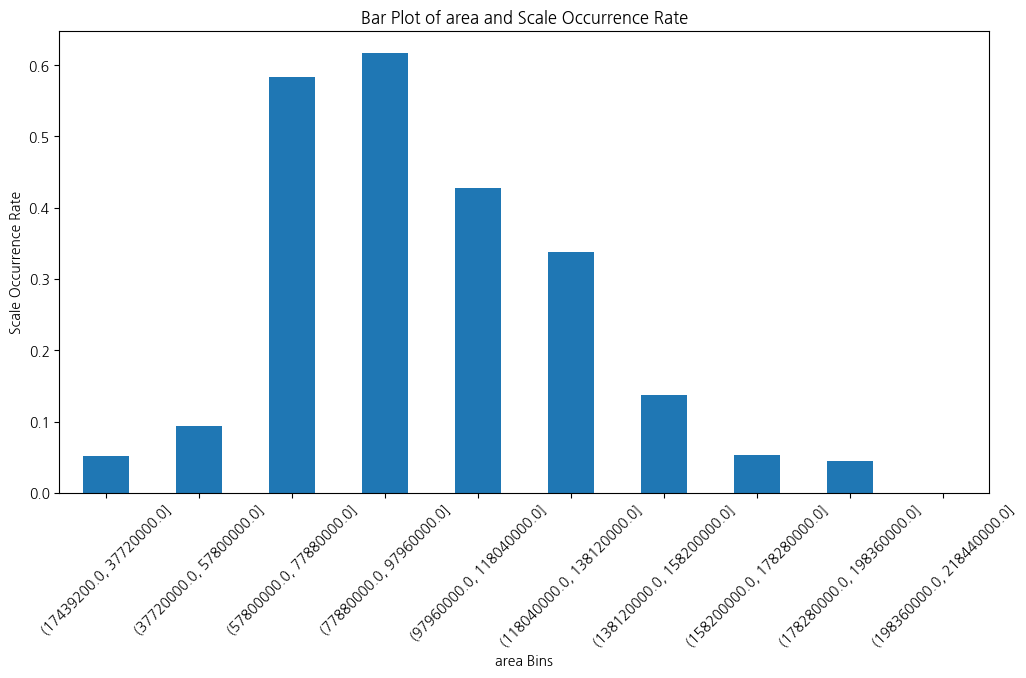

In [72]:
# 가열대 온도를 구간으로 나누기 (예: 10개의 동일한 크기 구간으로 나누기)
df_raw['area_bins'] = pd.cut(df_raw['area'], bins=10)

# 각 구간별로 scale의 평균값(불량률) 계산
mean_scale_by_temp = df_raw.groupby('area_bins')['scale'].mean()

# 막대 그래프로 시각화
plt.figure(figsize=(12, 6))
mean_scale_by_temp.plot(kind='bar')
plt.title('Bar Plot of area and Scale Occurrence Rate')
plt.xlabel('area Bins')
plt.ylabel('Scale Occurrence Rate')
plt.xticks(rotation=45)
plt.show()

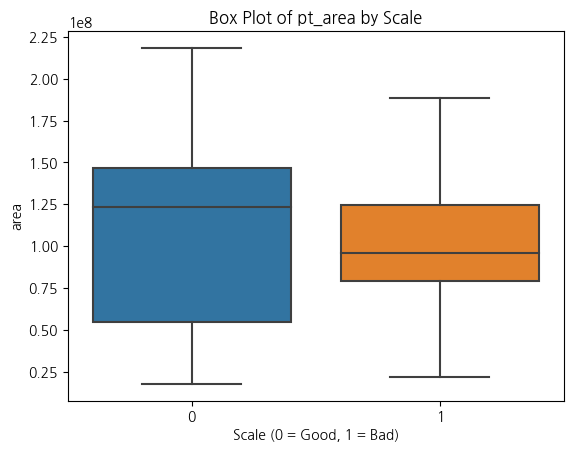

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='scale', y='area', data=df_raw)
plt.title('Box Plot of pt_area by Scale')
plt.xlabel('Scale (0 = Good, 1 = Bad)')
plt.ylabel('area')
plt.show()

10. 활성화 에너지

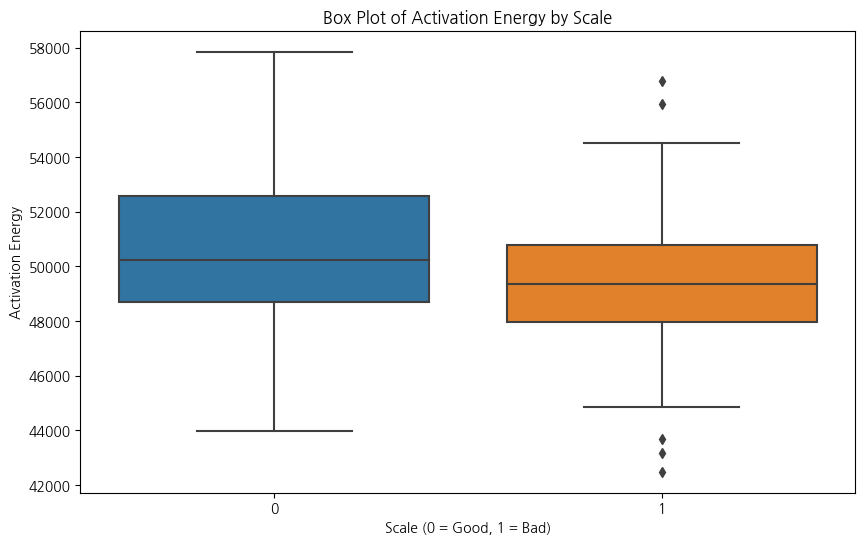

In [74]:
# 활성화 에너지와 scale 간의 관계를 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='scale', y='activation_energy', data=df_raw)
plt.title('Box Plot of Activation Energy by Scale')
plt.xlabel('Scale (0 = Good, 1 = Bad)')
plt.ylabel('Activation Energy')
plt.show()


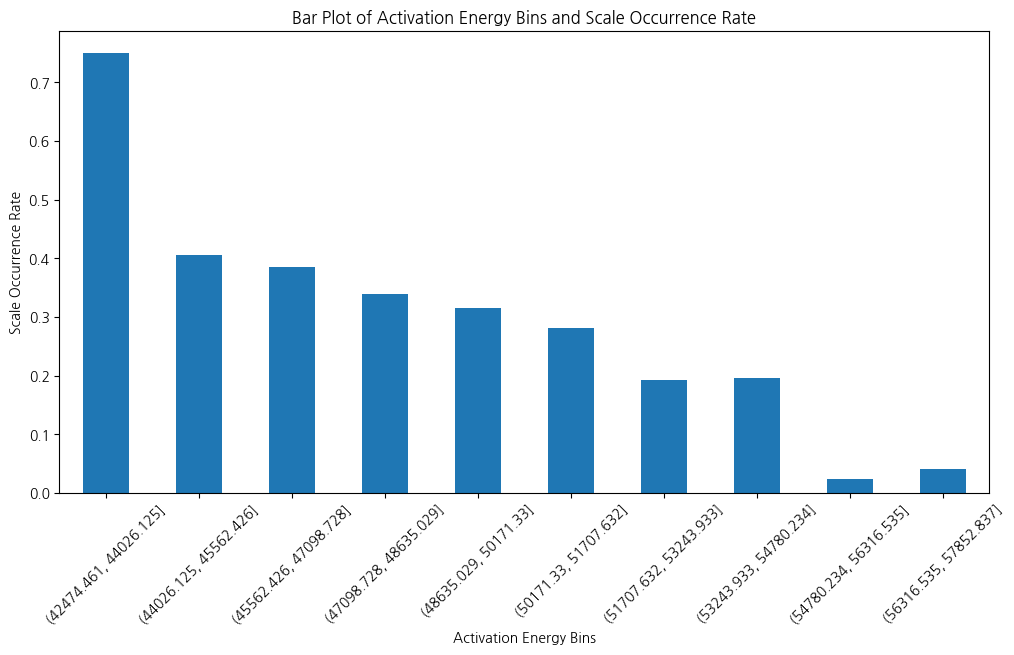

In [75]:
# 활성화 에너지를 구간화하여 scale과의 관계를 막대 그래프로 시각화
df_raw['activation_energy_bins'] = pd.cut(df_raw['activation_energy'], bins=10)
mean_scale_by_energy = df_raw.groupby('activation_energy_bins')['scale'].mean()

plt.figure(figsize=(12, 6))
mean_scale_by_energy.plot(kind='bar')
plt.title('Bar Plot of Activation Energy Bins and Scale Occurrence Rate')
plt.xlabel('Activation Energy Bins')
plt.ylabel('Scale Occurrence Rate')
plt.xticks(rotation=45)
plt.show()

11.scale이 높을 가열로 열 일수록 설비고장에 대한 가능성이있다. ->??????비슷한데??????

In [76]:
# 교차표 생성(열)
crosstab = pd.crosstab(df_raw['fur_input_row'], df_raw['scale'])
crosstab


scale,0,1
fur_input_row,,
1,340,142
2,344,121


In [77]:
df_raw_groups = df_raw.groupby(["fur_input_row"])["scale"]
df_raw_2 = pd.DataFrame(columns = ["fur_input_row", "scale_prob"])
c = 0.0
for name, g in df_raw_groups:
    c += g.tolist().count(1)/(g.shape[0])
    df_raw_2 = df_raw_2.append({"fur_input_row" : name , "scale_prob" : (g.tolist().count(1)/(g.shape[0])) * 100}, ignore_index = True )
df_raw_2

,fur_input_row,scale_prob
0,1,29.460581
1,2,26.021505


<Axes: ylabel='scale_prob'>

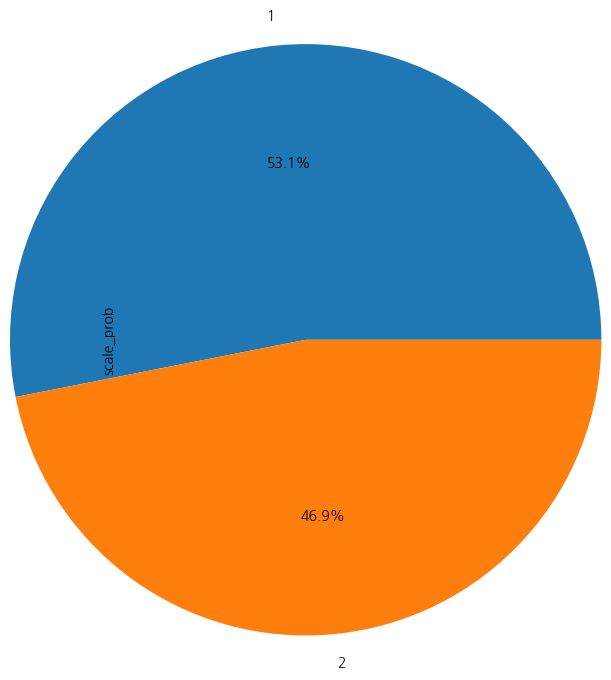

In [78]:
df_raw_2.plot.pie(y = "scale_prob", labels = df_raw_2["fur_input_row"], autopct= "%.1f%%", radius = 2, legend = False)

In [79]:
# 교차표 생성(호기)
crosstab = pd.crosstab(df_raw['fur_no'], df_raw['scale'])
crosstab


scale,0,1
fur_no,,
1,231,84
2,232,82
3,221,97


In [80]:
df_raw_groups = df_raw.groupby(["fur_no"])["scale"]
df_raw_2 = pd.DataFrame(columns = ["fur_no", "scale_prob"])
c = 0.0
for name, g in df_raw_groups:
    c += g.tolist().count(1)/(g.shape[0])
    df_raw_2 = df_raw_2.append({"fur_no" : name , "scale_prob" : (g.tolist().count(1)/(g.shape[0])) * 100}, ignore_index = True )
df_raw_2


,fur_no,scale_prob
0,1,26.666667
1,2,26.114650
2,3,30.503145


<Axes: ylabel='scale_prob'>

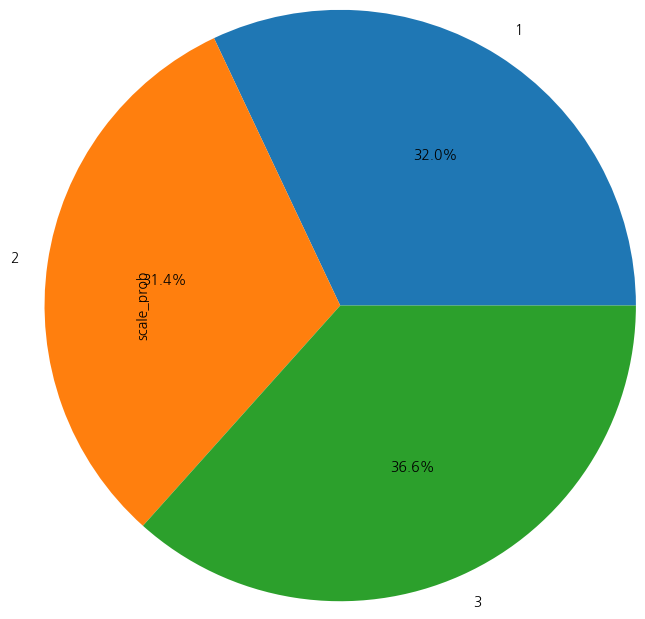

In [81]:
df_raw_2.plot.pie(y = "scale_prob", labels = df_raw_2["fur_no"], autopct= "%.1f%%", radius = 2, legend = False)

12.공정 시간이 길어질수록 scale이 많다.

In [82]:
correlation = df_raw['fur_total_time'].corr(df_raw['scale'])
print(f"Correlation between fur_total_time and Scale: {correlation}")

Correlation between fur_total_time and Scale: -0.1412280105794797


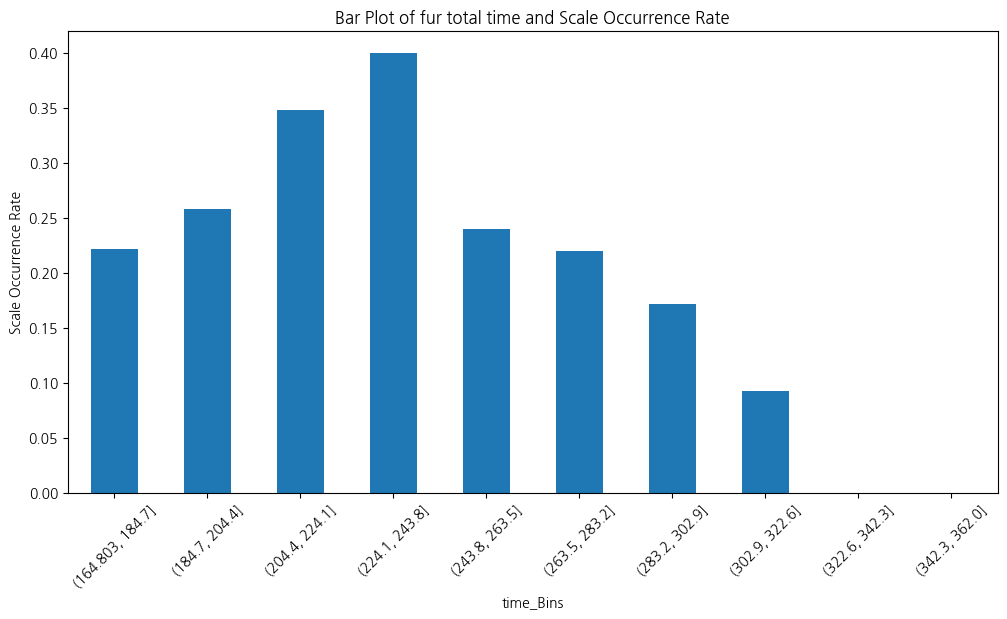

In [83]:
# 가열대 온도를 구간으로 나누기 (예: 10개의 동일한 크기 구간으로 나누기)
df_raw['time_bins'] = pd.cut(df_raw['fur_total_time'], bins=10)

# 각 구간별로 scale의 평균값(불량률) 계산
mean_scale_by_temp = df_raw.groupby('time_bins')['scale'].mean()

# 막대 그래프로 시각화
plt.figure(figsize=(12, 6))
mean_scale_by_temp.plot(kind='bar')
plt.title('Bar Plot of fur total time and Scale Occurrence Rate')
plt.xlabel('time_Bins')
plt.ylabel('Scale Occurrence Rate')
plt.xticks(rotation=45)
plt.show()

### 1) 연속형 변수와 scale의 상관관계 

In [84]:
df_raw_numeric = df_raw.select_dtypes(exclude = 'object')
df_raw_numeric.shape

(947, 22)

In [85]:
df_raw_numeric_x = df_raw_numeric.drop("scale", axis = 1)
df_raw_numeric_y = df_raw_numeric["scale"]
df_raw_numeric_x.head()

,pt_thick,pt_width,pt_length,hsb,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,...,descaling_count,area,area_bins,fur_heat_ratio,fur_heat_ratio_bins,activation_energy,activation_energy_bins,temp_bins,thick_bins,time_bins
0,32,3700,15100,0,1144,116,1133,59,259,0,...,8,55870000,"(37720000.0, 57800000.0]",0.447876,"(0.437, 0.474]",47865.881308,"(47098.728, 48635.029]","(900.5, 936.0]","(29.6, 38.4]","(243.8, 263.5]"
1,32,3700,15100,0,1144,122,1135,53,238,0,...,8,55870000,"(37720000.0, 57800000.0]",0.512605,"(0.511, 0.548]",46700.468677,"(45562.426, 47098.728]","(936.0, 971.5]","(29.6, 38.4]","(224.1, 243.8]"
2,33,3600,19200,0,1129,116,1121,55,258,0,...,8,69120000,"(57800000.0, 77880000.0]",0.449612,"(0.437, 0.474]",46657.702912,"(45562.426, 47098.728]","(865.0, 900.5]","(29.6, 38.4]","(243.8, 263.5]"
3,33,3600,19200,0,1152,125,1127,68,266,0,...,8,69120000,"(57800000.0, 77880000.0]",0.469925,"(0.437, 0.474]",49288.586425,"(48635.029, 50171.33]","(865.0, 900.5]","(29.6, 38.4]","(263.5, 283.2]"
4,38,3100,13300,0,1140,134,1128,48,246,0,...,8,41230000,"(37720000.0, 57800000.0]",0.544715,"(0.511, 0.548]",45336.441625,"(44026.125, 45562.426]","(865.0, 900.5]","(29.6, 38.4]","(243.8, 263.5]"


#### 연속변수와 scale의 상관관계 히스토그램으로 분석

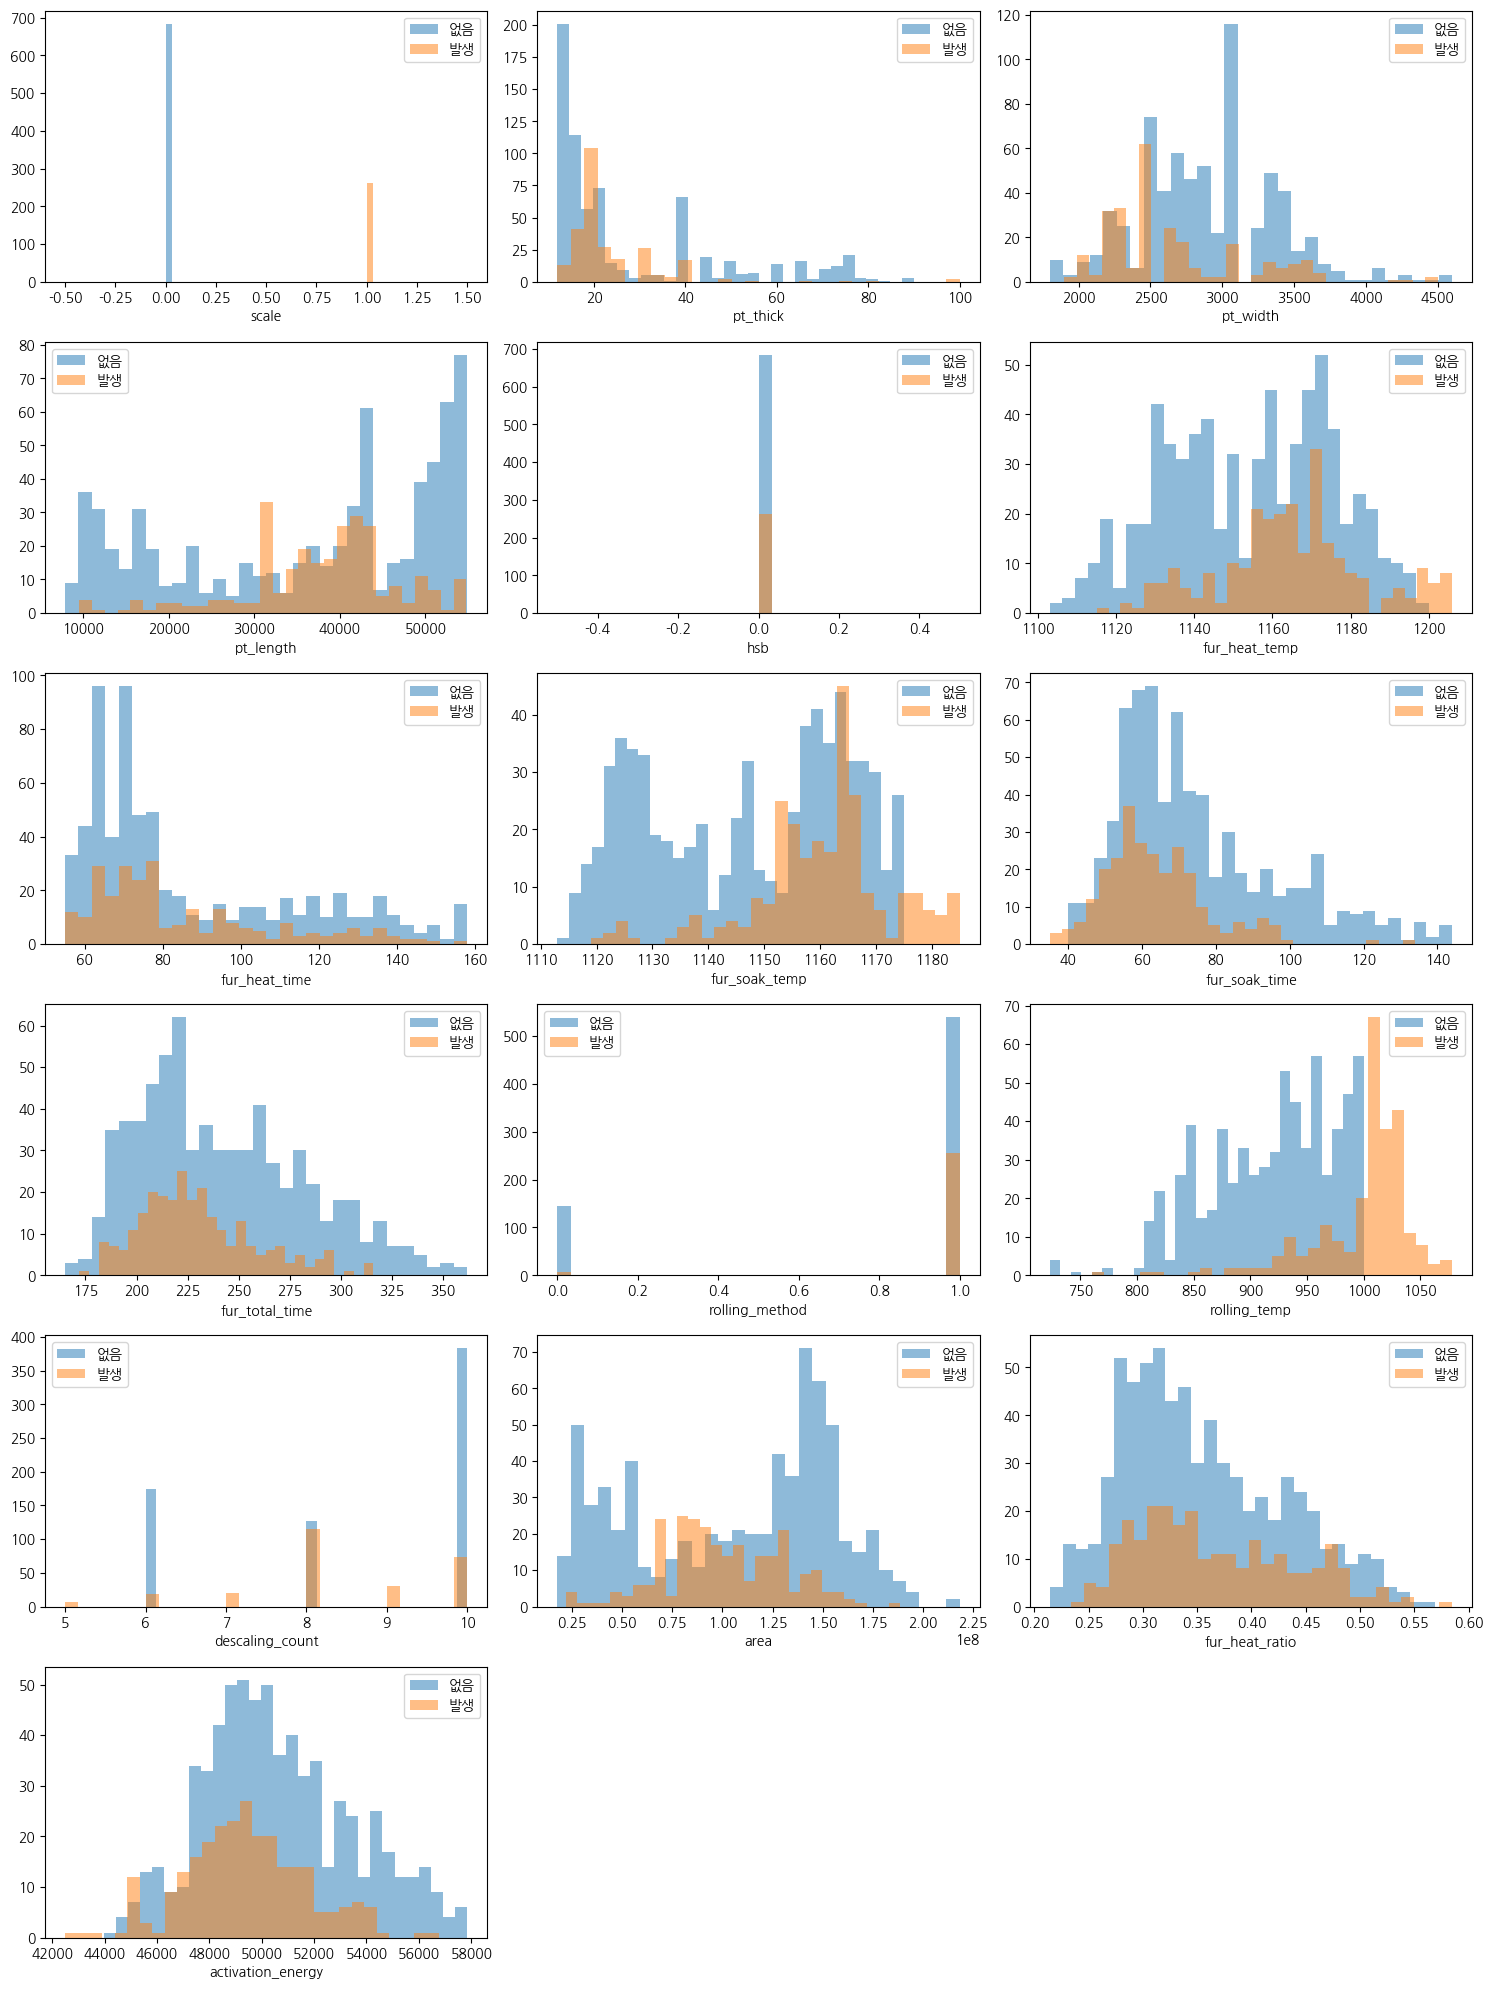

In [86]:
import matplotlib.pyplot as plt

# 연속형 변수만 선택
df_raw_numeric = df_raw.select_dtypes(include=[np.number])

# 서브플롯을 위한 설정
plt.figure(figsize=(15, 20))
i = 1

# 각 연속형 변수에 대해 히스토그램 생성
for col in df_raw_numeric.columns:
    plt.subplot(df_raw_numeric.shape[1]//3 + 1, 3, i)
    plt.hist(df_raw[df_raw["scale"] == 0][col].dropna(), label="없음", alpha=0.5, bins=30)
    plt.hist(df_raw[df_raw["scale"] == 1][col].dropna(), label="발생", alpha=0.5, bins=30)
    plt.xlabel(col)
    plt.legend()
    i += 1

plt.tight_layout()
plt.show()

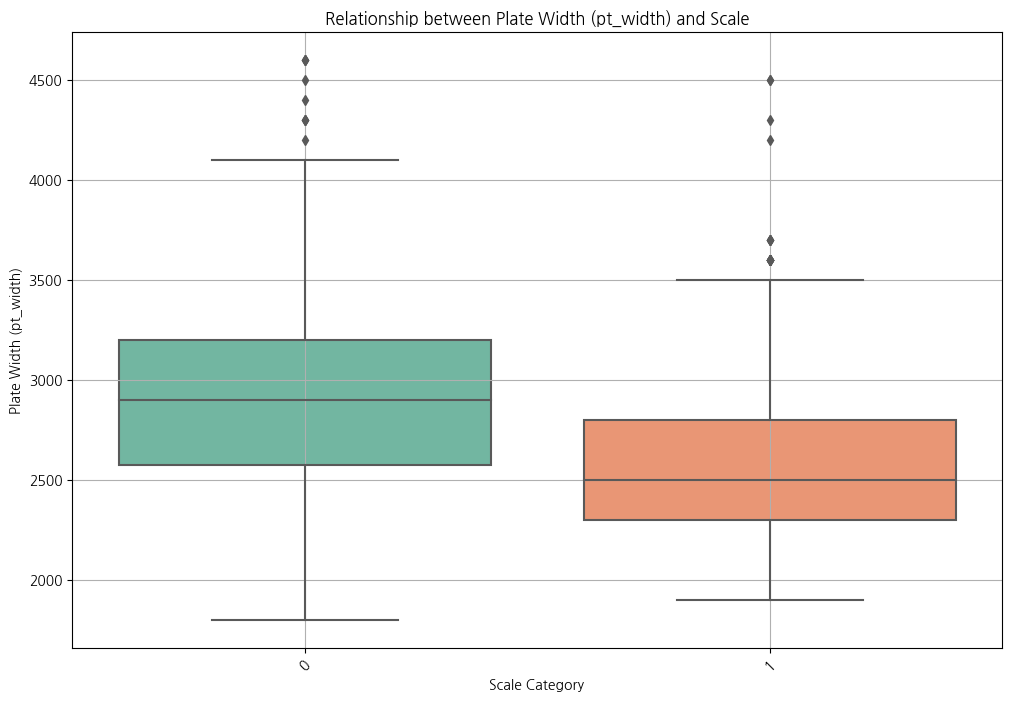

In [87]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='scale', y='pt_width', data=df_raw, palette='Set2')
plt.title('Relationship between Plate Width (pt_width) and Scale')
plt.xlabel('Scale Category')
plt.ylabel('Plate Width (pt_width)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### 상관관계 heatmap

<Axes: >

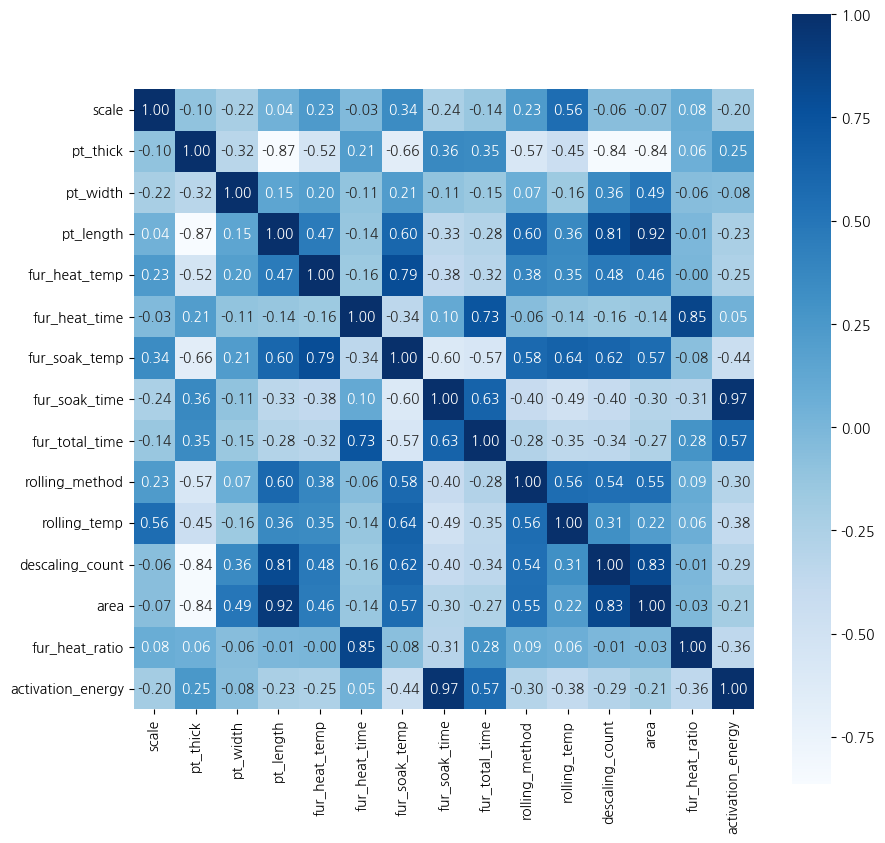

In [88]:
num = df_raw.select_dtypes(include=np.number) 
num = df_raw.select_dtypes(include=np.number).drop(columns=['hsb'])
plt.figure(figsize=(10, 10))
sns.heatmap(num.corr(), annot=True, square=True, fmt='.2f', annot_kws={'size': 10},cmap='Blues')

#### 범주형 변수 간 관계: 카이제곱검정

In [89]:
from scipy.stats import chi2_contingency

# 범주형 변수 선택
categorical_variables = ['steel_kind', 'fur_no', 'fur_input_row', 'rolling_method', 'descaling_count','work_group']

# 각 변수와 scale 간의 독립성을 평가하는 카이제곱 검정 수행
for var in categorical_variables:
    contingency_table = pd.crosstab(df_raw[var], df_raw['scale'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    print(f'Chi-square test for {var}:')
    print('Chi-square statistic:', chi2)
    print('p-value:', p_value)
    print()


Chi-square test for steel_kind:
Chi-square statistic: 82.16804781796199
p-value: 1.249942890945335e-19

Chi-square test for fur_no:
Chi-square statistic: 1.8043479686916595
p-value: 0.4056867437353576

Chi-square test for fur_input_row:
Chi-square statistic: 1.2292923518243377
p-value: 0.26754470293555244

Chi-square test for rolling_method:
Chi-square statistic: 47.07814073538968
p-value: 6.821221753089534e-12

Chi-square test for descaling_count:
Chi-square statistic: 255.07351065468234
p-value: 4.48131583111345e-53

Chi-square test for work_group:
Chi-square statistic: 17.398564572077944
p-value: 0.0005851182828497871



#### 범주형 vs 연속형:ANOVA검정

In [90]:
# 범주형 변수 선택
categorical_variables = ['steel_kind', 'fur_no', 'fur_input_row', 'rolling_method', 'descaling_count','work_group']

# 각 범주형 변수와 scale 간의 ANOVA 검정 수행
for var in categorical_variables:
    formula = f'scale ~ C({var})'  # ANOVA 모델 formula 생성
    model = ols(formula, data=df_raw).fit()  # ANOVA 모델 피팅
    anova_table = sm.stats.anova_lm(model)  # ANOVA 결과 테이블 생성
    
    print(f'ANOVA test for {var}:')
    print(anova_table)
    print()

ANOVA test for steel_kind:
                  df      sum_sq    mean_sq          F        PR(>F)
C(steel_kind)    1.0   16.790818  16.790818  91.629093  8.826183e-21
Residual       945.0  173.169055   0.183248        NaN           NaN

ANOVA test for fur_no:
              df      sum_sq   mean_sq         F    PR(>F)
C(fur_no)    2.0    0.361936  0.180968  0.901033  0.406499
Residual   944.0  189.597937  0.200845       NaN       NaN

ANOVA test for fur_input_row:
                     df      sum_sq  mean_sq         F   PR(>F)
C(fur_input_row)    1.0    0.279920  0.27992  1.394581  0.23793
Residual          945.0  189.679954  0.20072       NaN      NaN

ANOVA test for rolling_method:
                      df      sum_sq   mean_sq          F        PR(>F)
C(rolling_method)    1.0    9.717462  9.717462  50.948061  1.888996e-12
Residual           945.0  180.242411  0.190733        NaN           NaN

ANOVA test for descaling_count:
                       df      sum_sq    mean_sq          F  

#### 연속형변수 vs 연속형 변수: 상관분석

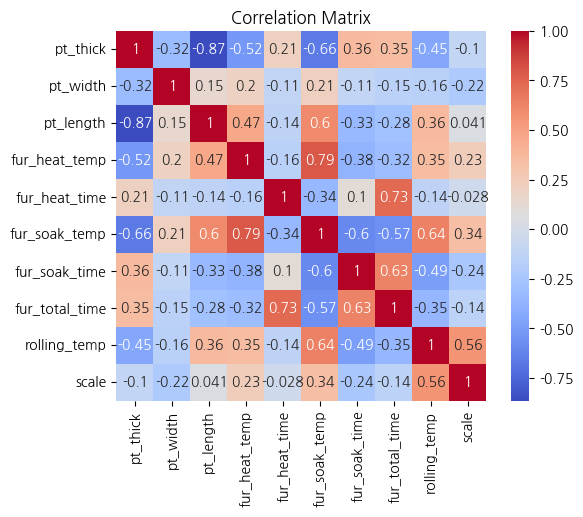

Correlation with scale:
pt_thick         -0.101411
pt_width         -0.221830
pt_length         0.040814
fur_heat_temp     0.229201
fur_heat_time    -0.027522
fur_soak_temp     0.342939
fur_soak_time    -0.244076
fur_total_time   -0.141228
rolling_temp      0.560397
scale             1.000000
Name: scale, dtype: float64


In [91]:
# 상관 분석
variables = ['pt_thick', 'pt_width', 'pt_length', 'fur_heat_temp','fur_heat_time','fur_soak_temp','fur_soak_time','fur_total_time','rolling_temp']

# 변수들 간의 상관 계수 행렬 계산
corr_matrix = df_raw[variables + ['scale']].corr()

# Heatmap으로 상관 계수 행렬 시각화
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Price_log과 각 변수들 간의 상관 계수
print('Correlation with scale:')
print(corr_matrix['scale'])